In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from IPython.utils import io
from PyEyeSim import EyeData

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
Path='C:/Users/Utente/Documents/University/Courses/P1&P2/EyeMovementDat/'
FilePath=Path+'merged.csv'
FixData=pd.read_csv(FilePath, sep=',',header=0, dtype={'subject': str})
print(np.shape(FixData))

(265703, 12)


In [4]:
# delete every row where the repetition is not 0 and record_number is not 0
FixData=FixData[FixData['repetition']==0]
FixData=FixData[FixData['record_number']==0]
print(np.shape(FixData))

(258562, 12)


dataset size:  (258562, 12)
presentation size:  x= 1920 pixels y= 1080  pixels
presentation size:  x= 1920 pixels y= 1080  pixels
Stimulus  not found !!, provide column as Stimulus =YourColumn , default:  Stimulus
subjectID  not found !!, provide column as subjectID =YourColumn , default:  subjectID
mean_x  not found !!, provide column as mean_x =YourColumn , default:  mean_x
mean_y  not found !!, provide column as mean_y =YourColumn , default:  mean_y
info found for 200 subjects, and 36 stimuli
sizecorrect =  True ; If stimulus not full screen, assume central presentation, use correction
run descriptive analysis
Data for  200 observers and  36  stimuli.


C:\Users\Utente\Documents\University\Master\PyEyeSim\PyEyeSim\__init__.py:281: UserWarning: Stim path not provided
  warnings.warn("Stim path not provided")


Mean fixation number:  36.89  +/-  9.95
fixation duration not asked for
Num of trials with zero fixations: 0
Num valid trials  7028
Mean X location:  476.5  +/-  92.1  pixels
Mean Y location:  465.2  +/-  65.3  pixels
Mean saccade  amplitude:  79.9  +/-  19.2  pixels
Mean scanpath  length:  2482.0  +/-  566.8  pixels
Data for  200 observers and  36  stimuli.
Mean fixation number:  36.89  +/-  9.95
fixation duration not asked for
Num of trials with zero fixations: 0
Num valid trials  7028
Mean X location:  476.5  +/-  92.1  pixels
Mean Y location:  465.2  +/-  65.3  pixels
Mean saccade  amplitude:  79.9  +/-  19.2  pixels
Mean scanpath  length:  2482.0  +/-  566.8  pixels


(array([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,   11,
          12,   13,   14,   15,   16,   17,   18,   19,   20,   21,   22,
          23,   24,   25,   26,   27,   28,   29,   30, 8881, 8882, 8883,
        8884, 8885, 8886], dtype=int64),
 array(['21418', '21422', '21463', '21468', '21469', '21474', '21480',
        '21498', '21513', '21522', '21526', '21531', '21568', '21629',
        '21630', '21636', '21641', '21653', '21658', '21667', '21680',
        '21683', '21685', '21699', '21706', '21735', '21774', '21811',
        '21819', '21820', '21862', '21878', '21889', '21927', '21930',
        '21939', '21946', '22018', '22036', '22108', '22109', '22127',
        '22129', '22138', '22149', '22168', '22174', '22180', '22181',
        '22186', '22204', '22214', '22219', '22228', '22234', '22239',
        '22242', '22261', '22271', '22279', '22291', '22322', '22324',
        '22327', '22341', '22346', '22376', '22378', '22383', '22388',
        '22394', '22410', '

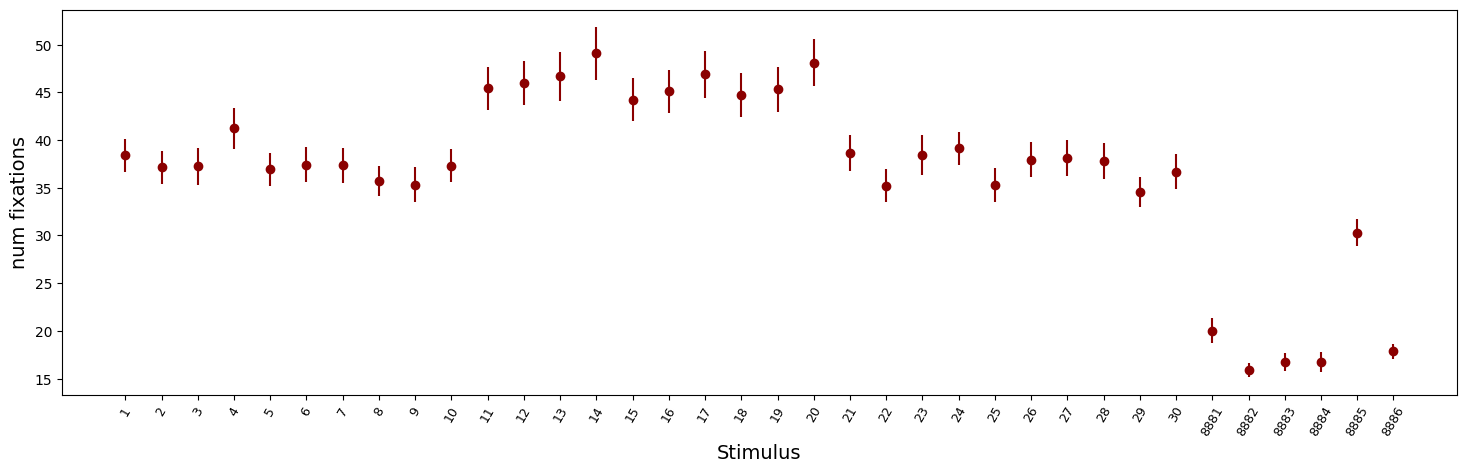

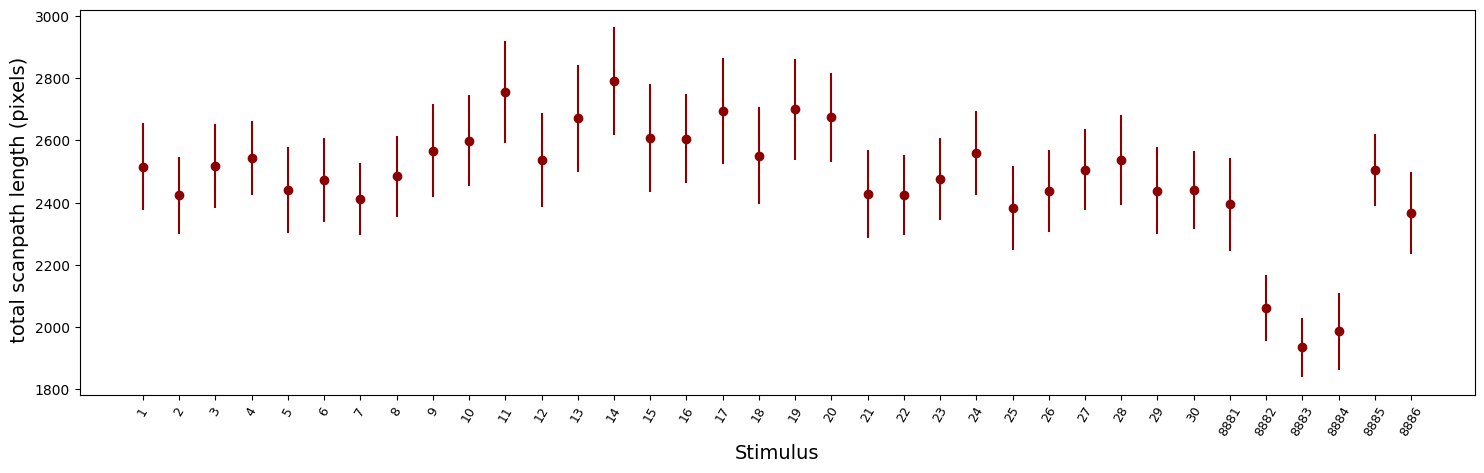

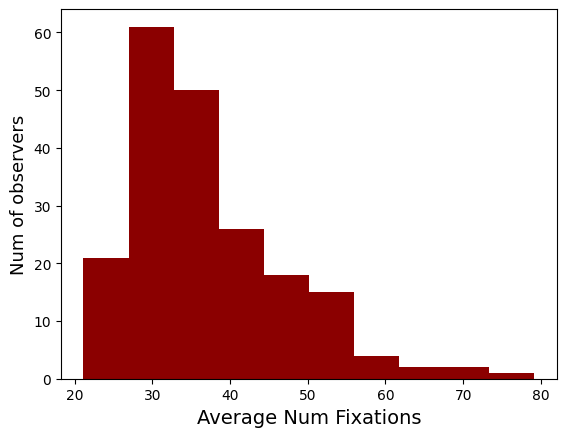

In [5]:

#sizeX,sizeY=1024, 768 
sizeX,sizeY=1920, 1080


DyslexiaDat=EyeData(FixData,sizeX,sizeY)
DyslexiaDat.DataInfo(mean_x='fix_x',mean_y='fix_y',FixDuration='duration_ms',Stimulus='stimulus',subjectID='subject')
DyslexiaDat.RunDescriptiveFix(Visual=1)

---

In [6]:
complete_data = []
missing_data = {}
subject_with_missing_data = {}
set_subj = set()
for i in range(0,36):
    FixGr=np.array(DyslexiaDat.nfix[0:117,i])
    if not np.isnan(FixGr).any():
        complete_data.append(i)
    if np.isnan(FixGr).any():
        missing_data[i] = np.isnan(FixGr).sum()
        for x in np.where(np.isnan(FixGr))[0]:
            subject_with_missing_data[x] = +1
            set_subj.add(x)


print(f'{len(complete_data)} Stimuli with complete data: {complete_data}')
print(f'{len(missing_data)} Stimuli with Missing data: {missing_data}')
print(f'Max subject that have not seen the stimulus: {max(missing_data.values())}')
print(f'{len(subject_with_missing_data)} Subjects with missing data: {subject_with_missing_data}')

10 Stimuli with complete data: [0, 3, 4, 5, 7, 15, 18, 28, 31, 32]
26 Stimuli with Missing data: {1: 1, 2: 1, 6: 1, 8: 1, 9: 1, 10: 3, 11: 3, 12: 2, 13: 3, 14: 1, 16: 2, 17: 1, 19: 2, 20: 1, 21: 1, 22: 1, 23: 1, 24: 2, 25: 1, 26: 2, 27: 1, 29: 1, 30: 1, 33: 1, 34: 2, 35: 3}
Max subject that have not seen the stimulus: 3
29 Subjects with missing data: {115: 1, 43: 1, 53: 1, 10: 1, 15: 1, 17: 1, 91: 1, 94: 1, 116: 1, 32: 1, 83: 1, 20: 1, 41: 1, 96: 1, 55: 1, 44: 1, 82: 1, 14: 1, 2: 1, 66: 1, 73: 1, 58: 1, 25: 1, 99: 1, 64: 1, 8: 1, 27: 1, 76: 1, 80: 1}


Here we check for the Munich subjects, the amount of stimuli and subject that have some empty data. In other words, we check for every subjects wich and how many stimuli they have not seen (or have been delete because with repetition > 0 and record_number > 0)

Over 36 stimuli 26 have at least one subject that have not seen them.

Over 117 subject only 20 have not seen at least one stimuli (actually every of these subjects have got a proble with one stimulus).

We can consider to remove this 20 subject from the dataset (that correspond to around 17% of the total), or consider to use only the 10 stimui that have full data for every subject, or every time that we randomly select a combination of stimulus/subject check if the subject has seen the stimulus and if not substitute it with another one.

---

In [7]:
WhichC, WhichCN = DyslexiaDat.GetGroups('Group')

Conditions [ 1.  2.  3.  4. nan]


In [8]:
# convert WhichCN to a numpy array of type float
WhichCN = np.array(WhichCN, dtype=float)
# substitute nan values with max value + 1
WhichCN[np.isnan(WhichCN)] = 0
WhichCN = WhichCN.astype(int)
WhichCN

array([1, 4, 4, 3, 3, 3, 2, 4, 4, 4, 2, 3, 3, 3, 3, 1, 1, 1, 1, 1, 3, 4,
       3, 1, 1, 1, 4, 1, 4, 4, 3, 4, 0, 1, 1, 4, 4, 2, 1, 1, 2, 1, 4, 1,
       2, 3, 1, 2, 4, 1, 4, 3, 2, 2, 2, 1, 4, 1, 1, 1, 2, 3, 4, 4, 1, 2,
       4, 2, 1, 2, 1, 1, 1, 1, 3, 3, 2, 4, 2, 4, 1, 4, 2, 1, 2, 3, 3, 2,
       4, 1, 1, 3, 3, 1, 0, 1, 4, 4, 2, 0, 4, 4, 4, 3, 4, 2, 2, 1, 4, 4,
       4, 4, 4, 4, 3, 1, 1, 3, 4, 2, 3, 3, 4, 3, 4, 4, 4, 3, 4, 4, 1, 2,
       1, 3, 1, 3, 3, 3, 3, 4, 3, 3, 2, 4, 4, 3, 2, 4, 1, 1, 0, 4, 1, 4,
       1, 4, 4, 4, 4, 3, 1, 1, 4, 3, 3, 3, 1, 2, 4, 2, 3, 1, 4, 4, 3, 3,
       3, 2, 4, 4, 4, 4, 1, 3, 0, 0, 3, 2, 4, 4, 4, 4, 4, 1, 1, 3, 1, 4,
       4, 0])

In [9]:
WhichC = np.array(WhichC, dtype=float)
WhichC[np.isnan(WhichC)] = 4
WhichC = WhichC.astype(int)
WhichC

array([0, 3, 3, 2, 2, 2, 1, 3, 3, 3, 1, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 3,
       2, 0, 0, 0, 3, 0, 3, 3, 2, 3, 4, 0, 0, 3, 3, 1, 0, 0, 1, 0, 3, 0,
       1, 2, 0, 1, 3, 0, 3, 2, 1, 1, 1, 0, 3, 0, 0, 0, 1, 2, 3, 3, 0, 1,
       3, 1, 0, 1, 0, 0, 0, 0, 2, 2, 1, 3, 1, 3, 0, 3, 1, 0, 1, 2, 2, 1,
       3, 0, 0, 2, 2, 0, 4, 0, 3, 3, 1, 4, 3, 3, 3, 2, 3, 1, 1, 0, 3, 3,
       3, 3, 3, 3, 2, 0, 0, 2, 3, 1, 2, 2, 3, 2, 3, 3, 3, 2, 3, 3, 0, 1,
       0, 2, 0, 2, 2, 2, 2, 3, 2, 2, 1, 3, 3, 2, 1, 3, 0, 0, 4, 3, 0, 3,
       0, 3, 3, 3, 3, 2, 0, 0, 3, 2, 2, 2, 0, 1, 3, 1, 2, 0, 3, 3, 2, 2,
       2, 1, 3, 3, 3, 3, 0, 2, 4, 4, 2, 1, 3, 3, 3, 3, 3, 0, 0, 2, 0, 3,
       3, 4])

In [10]:
from PyEyeSim.visualhelper import MeanPlot
from scipy import stats
def CompareGroupsFix(self,WhichC, class_labels=None):
    '''
    Description: Run a set of between-group fixation comparisons, generate plots, and print descriptive statistics.
    should work for 2-4 groups
    calculates:
    - number of fixations
    - entropy of fixations (potentially long run time)
    - total scanpath length
    - saccade amplitude

    prints descriptive stats of the above
    print pairwise comparison of groups with the above measures
    
    Arguments: 
    betwcond (str): Name of the conditions for between-group fixation comparisons.
    '''
    
    print('!runnning between group comparison')
    if hasattr(self,'entropies')==False:   # check if entropy has already been calculated
        print('Calculating entropy')
        Entropies,self.entropmax,self.entropies_ind=self.GetEntropies()
    Cols=['darkblue','cornflowerblue','darkred','orange','salmon']
    #plt.figure(figsize=(8,8))
    fig,ax=plt.subplots(ncols=2,nrows=2,figsize=(10,8))
    Entrs=[]
    Fixies=[]
    ScanpLs=[]
    SaccAmpls=[] 
    for cc,c in enumerate(self.Conds):
        if np.isnan(c):
            continue
        c = int(c)
        Idx=np.nonzero(WhichC==cc)[0]
        FixGr=np.array(self.nfix[Idx,:])
        EntrGr=self.entropies_ind[Idx,:]
        Entrs.append(np.nanmean(EntrGr,1))
        Fixies.append(np.nanmean(FixGr,1))
        ScanpLs.append(np.nanmean(self.len_scanpath[Idx,:],1))
        SaccAmpls.append(np.nanmean(self.sacc_ampl[Idx,:],1))
     
        print(cc,c,'num participants: ',len(Idx))

        print(cc,c,'Num fix= ',np.round(np.mean(np.nanmean(FixGr,1)),2),'+/-',np.round(np.std(np.nanmean(FixGr,1)),2))
        print(cc,c,'max num fix= ',np.round(np.max(np.nanmean(FixGr,1)),2))
        print(cc,c,'min num fix= ',np.round(np.min(np.nanmean(FixGr,1)),2))
        print(cc,c,'Entropy= ',np.round(np.mean(np.nanmean(EntrGr,1)),2),'+/-',np.round(np.std(np.nanmean(EntrGr,1)),2))
        print(cc,c,'tot scanpath len = ',np.round(np.mean(np.nanmean(self.len_scanpath[Idx,:],1)),2),'+/-',np.round(np.std(np.nanmean(self.len_scanpath[Idx,:],1)),2),'pix')
        print(cc,c,'saccade amplitude = ',np.round(np.mean(np.nanmean(self.sacc_ampl[Idx,:],1)),2),'+/-',np.round(np.std(np.nanmean(self.sacc_ampl[Idx,:],1)),2),'pix')
        print('')
        MeanPlot(self.np,FixGr,yLab='Num Fixations',xtickL=self.stimuli,label=class_labels[cc],color=Cols[cc],ax=ax[0,0])
        MeanPlot(self.np,EntrGr,yLab='Entropy',xtickL=self.stimuli,label=class_labels[cc],color=Cols[cc],ax=ax[0,1])
        MeanPlot(self.np,self.len_scanpath[Idx,:],yLab='tot scanpath len (pix)',xtickL=self.stimuli,label=class_labels[cc],color=Cols[cc],ax=ax[1,0])
        MeanPlot(self.np,self.sacc_ampl[Idx,:],yLab='saccade amplitude (pix)',xtickL=self.stimuli,label=class_labels[cc],color=Cols[cc],ax=ax[1,1])
    
    
    plt.legend()
    plt.tight_layout()
    
    for gr1 in range(len(self.Conds)):
        if np.isnan(self.Conds[gr1]):
            continue
        for gr2 in range(len(self.Conds)):
            if np.isnan(self.Conds[gr2]):
                continue
            if gr1 < gr2:
                print()
                t,p=stats.ttest_ind(Entrs[gr1],Entrs[gr2])
                print(' ')
                print('Overall group differences: ',self.Conds[gr1],'vs',self.Conds[gr2] )
                print('Entropy t=',np.round(t,4),', p=',np.round(p,4))
                #if pglib:
                 #   pg.ttest(Fixies[0],Fixies[1],paired=False)
                #else:
                t,p=stats.ttest_ind(Fixies[gr1],Fixies[gr2])
                print('Num Fix t=',np.round(t,4),', p= ',np.round(p,4))
                t,p=stats.ttest_ind(ScanpLs[gr1],ScanpLs[gr2])
                
            
                print('Scanpath lengths t=',np.round(t,4),', p=',np.round(p,4))
                t,p=stats.ttest_ind(SaccAmpls[gr1],SaccAmpls[gr2])
            
                print('Saccade amplitudes t=',np.round(t,4),', p=',np.round(p,4))
                print(' ')

    
    return 

!runnning between group comparison
Calculating entropy
resolution x = 1920  y = 1080


c:\ProgramData\anaconda3\envs\eyesim\Lib\site-packages\scipy\stats\_entropy.py:147: RuntimeWarning: divide by zero encountered in divide
  pk = 1.0*pk / xp.sum(pk, axis=axis, keepdims=True)  # type: ignore[operator]


0 1 4.37 maximum entropy 6.68
resolution x = 1920  y = 1080
1 2 4.34 maximum entropy 6.68
resolution x = 1920  y = 1080
2 3 4.31 maximum entropy 6.68
resolution x = 1920  y = 1080
3 4 4.42 maximum entropy 6.68
resolution x = 1920  y = 1080
4 5 4.44 maximum entropy 6.68
resolution x = 1920  y = 1080
5 6 4.34 maximum entropy 6.68
resolution x = 1920  y = 1080
6 7 4.37 maximum entropy 6.68
resolution x = 1920  y = 1080
7 8 4.36 maximum entropy 6.68
resolution x = 1920  y = 1080
8 9 4.44 maximum entropy 6.68
resolution x = 1920  y = 1080
9 10 4.32 maximum entropy 6.68
resolution x = 1920  y = 1080
10 11 4.32 maximum entropy 6.68
resolution x = 1920  y = 1080
11 12 4.33 maximum entropy 6.68
resolution x = 1920  y = 1080
12 13 4.34 maximum entropy 6.68
resolution x = 1920  y = 1080
13 14 4.32 maximum entropy 6.68
resolution x = 1920  y = 1080
14 15 4.3 maximum entropy 6.68
resolution x = 1920  y = 1080
15 16 4.39 maximum entropy 6.68
resolution x = 1920  y = 1080
16 17 4.39 maximum entropy 6

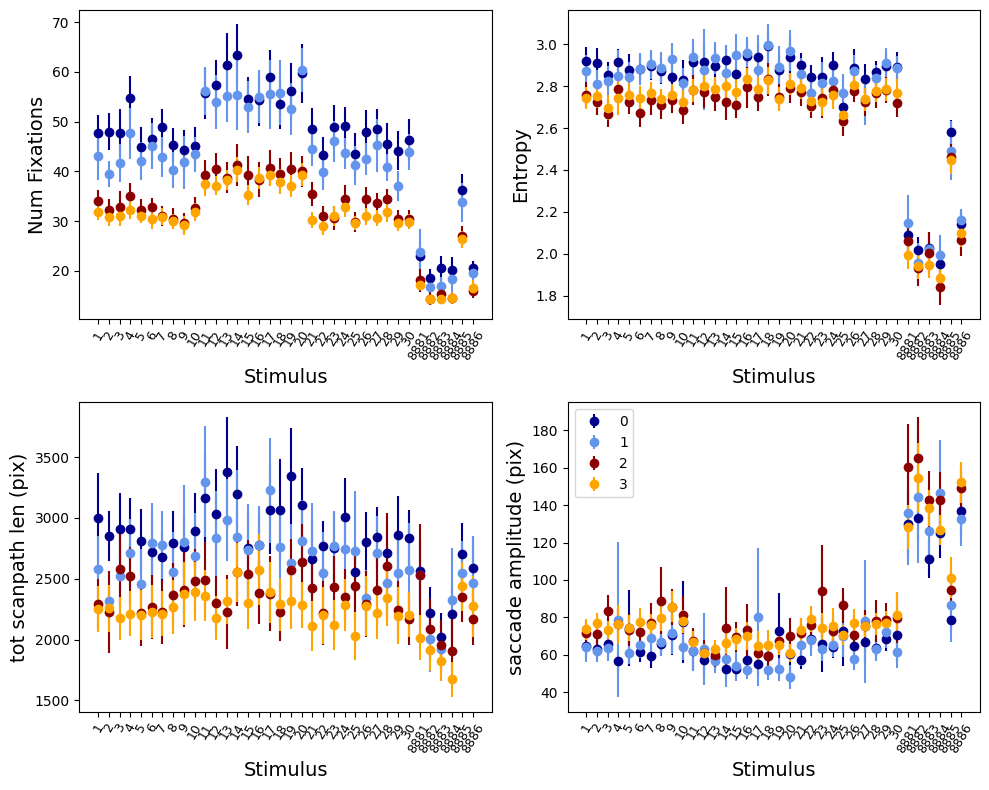

In [11]:
CompareGroupsFix(DyslexiaDat, WhichC, class_labels=['0','1','2','3'])

In [12]:
WhichC, WhichCN = DyslexiaDat.GetGroups('Group')

Conditions [ 1.  2.  3.  4. nan]


In [13]:
WhichC = np.array(WhichC, dtype=float)
WhichC[np.isnan(WhichC)] = 4
WhichC = WhichC.astype(int)
WhichC[WhichC == 0] = 1
WhichC[WhichC == 2] = 0
WhichC[WhichC == 3] = 0
WhichC[WhichC == 4] = 0
WhichC

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0])

In [14]:
# convert WhichCN to a numpy array of type float
WhichCN = np.array(WhichCN, dtype=float)
# substitute nan values with max value + 1
WhichCN[np.isnan(WhichCN)] = 0 
WhichCN = WhichCN.astype(int)
# Trasform all 4 in 0
WhichCN[WhichCN == 4] = 0
WhichCN[WhichCN == 3] = 0
# Trasform all 1,2 in 1
WhichCN[WhichCN == 2] = 1
WhichCN

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0])

In [15]:
from PyEyeSim.visualhelper import MeanPlot
from scipy import stats
def CompareGroupsFix(self,WhichC, class_labels=None):
    '''
    Description: Run a set of between-group fixation comparisons, generate plots, and print descriptive statistics.
    should work for 2-4 groups
    calculates:
    - number of fixations
    - entropy of fixations (potentially long run time)
    - total scanpath length
    - saccade amplitude

    prints descriptive stats of the above
    print pairwise comparison of groups with the above measures
    
    Arguments: 
    betwcond (str): Name of the conditions for between-group fixation comparisons.
    '''
    
    print('!runnning between group comparison')
    if hasattr(self,'entropies')==False:   # check if entropy has already been calculated
        print('Calculating entropy')
        Entropies,self.entropmax,self.entropies_ind=self.GetEntropies()
    Cols=['darkblue','cornflowerblue','darkred','orange','salmon']
    #plt.figure(figsize=(8,8))
    fig,ax=plt.subplots(ncols=2,nrows=2,figsize=(10,8))
    Entrs=[]
    Fixies=[]
    ScanpLs=[]
    SaccAmpls=[] 
    for cc,c in enumerate(class_labels):
        c = int(c)
        Idx=np.nonzero(WhichC==cc)[0]
        FixGr=np.array(self.nfix[Idx,:])
        EntrGr=self.entropies_ind[Idx,:]
        Entrs.append(np.nanmean(EntrGr,1))
        Fixies.append(np.nanmean(FixGr,1))
        ScanpLs.append(np.nanmean(self.len_scanpath[Idx,:],1))
        SaccAmpls.append(np.nanmean(self.sacc_ampl[Idx,:],1))
     
        print(cc,c,'num participants: ',len(Idx))

        print(cc,c,'Num fix= ',np.round(np.mean(np.nanmean(FixGr,1)),2),'+/-',np.round(np.std(np.nanmean(FixGr,1)),2))
        print(cc,c,'max num fix= ',np.round(np.max(np.nanmean(FixGr,1)),2))
        print(cc,c,'min num fix= ',np.round(np.min(np.nanmean(FixGr,1)),2))
        print(cc,c,'Entropy= ',np.round(np.mean(np.nanmean(EntrGr,1)),2),'+/-',np.round(np.std(np.nanmean(EntrGr,1)),2))
        print(cc,c,'tot scanpath len = ',np.round(np.mean(np.nanmean(self.len_scanpath[Idx,:],1)),2),'+/-',np.round(np.std(np.nanmean(self.len_scanpath[Idx,:],1)),2),'pix')
        print(cc,c,'saccade amplitude = ',np.round(np.mean(np.nanmean(self.sacc_ampl[Idx,:],1)),2),'+/-',np.round(np.std(np.nanmean(self.sacc_ampl[Idx,:],1)),2),'pix')
        print('')
        MeanPlot(self.np,FixGr,yLab='Num Fixations',xtickL=self.stimuli,label=class_labels[c],color=Cols[cc],ax=ax[0,0])
        MeanPlot(self.np,EntrGr,yLab='Entropy',xtickL=self.stimuli,label=class_labels[c],color=Cols[cc],ax=ax[0,1])
        MeanPlot(self.np,self.len_scanpath[Idx,:],yLab='tot scanpath len (pix)',xtickL=self.stimuli,label=class_labels[c],color=Cols[cc],ax=ax[1,0])
        MeanPlot(self.np,self.sacc_ampl[Idx,:],yLab='saccade amplitude (pix)',xtickL=self.stimuli,label=class_labels[c],color=Cols[cc],ax=ax[1,1])
    
    
    plt.legend()
    plt.tight_layout()

    return 

!runnning between group comparison
0 0 num participants:  119
0 0 Num fix=  31.52 +/- 6.06
0 0 max num fix=  68.45
0 0 min num fix=  21.14
0 0 Entropy=  2.64 +/- 0.17
0 0 tot scanpath len =  2300.54 +/- 531.55 pix
0 0 saccade amplitude =  84.34 +/- 20.42 pix

1 1 num participants:  81
1 1 Num fix=  44.77 +/- 9.27
1 1 max num fix=  79.17
1 1 min num fix=  30.09
1 1 Entropy=  2.75 +/- 0.17
1 1 tot scanpath len =  2748.51 +/- 508.78 pix
1 1 saccade amplitude =  73.46 +/- 15.18 pix



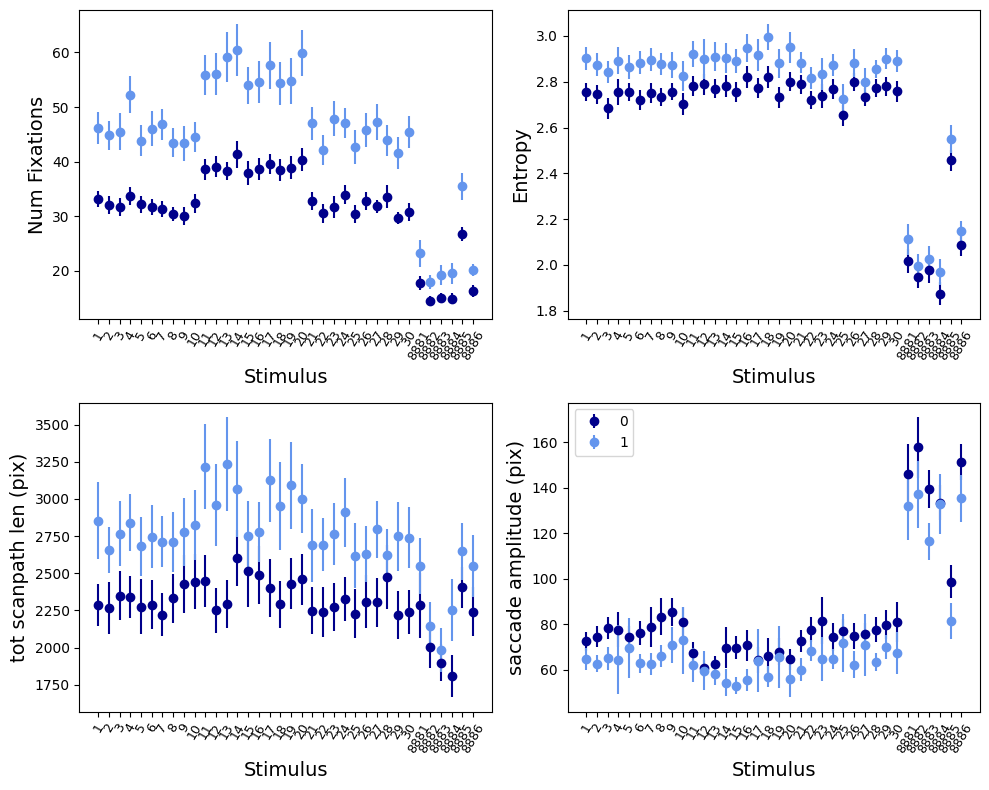

In [16]:
CompareGroupsFix(DyslexiaDat, WhichC, class_labels=['0','1'])

In [17]:
Idx=np.nonzero(WhichC==1)[0]
FixGr=np.array(DyslexiaDat.nfix[Idx,19])
print(FixGr)
#remove nan values
FixGr = FixGr[~np.isnan(FixGr)]
print('max num fix= ',np.max(FixGr))
print('min num fix= ',np.min(FixGr))
print('average num fix= ',np.mean(FixGr))

[ 17.  53.  72.  48.  42.  93.  51.  62.  48.  56.  59.  70.  49.  73.
  69.  50.  53.  54.  42.  57.  nan  54.  66.  52.  34.  47.  78. 107.
  50.  54.  41.  49.  29.  49.  52.  82.  62.  61.  58.  98.  85.  67.
  71.  49.  nan  39.  49.  70.  68. 102.  69.  40.  44.  53.  58.  67.
  64. 104.  57.  96.  65.  76.  65.  64.  69.  39.   9.  nan  77.  nan
  43.  76.  58.  84.  46.  60.  61.  74.  41.  49.  65.]
max num fix=  107.0
min num fix=  9.0
average num fix=  59.922077922077925


In [18]:
Idx=np.nonzero(WhichC==0)[0]
FixGr=np.array(DyslexiaDat.nfix[Idx,19])
print(FixGr)
# remove 1 max and 1 min value
FixGr = FixGr[~np.isnan(FixGr)]
print('max num fix= ',np.max(FixGr))
print('min num fix= ',np.min(FixGr))
print('average num fix= ',np.mean(FixGr))

[43. 45. 32. 46. 30. 56. 27. 32. 53. 40. 33. 49. 54. 41. 47. 33. 73. 25.
 29. 45. 99. 31. 48. 28. 43. 50. 25. 48. 50. 32. 38. 31. 51. 28. 27. 29.
 35. 38. 32. 50. 35. 45. 45. 30. 48. 37. 54. 52. 42. 42. 51. 42. 33. 40.
 38. 38. 42. 37. 32. 27. 42. 40. 40. 28. 37. 26. nan 44. 51. 39. 45. 46.
 34. 34. 38. 49. 52. 57. 40. 33. 36. 42. 58. 46. 30. 32. 37. 51. 41. 31.
 77. 46. 38. 36. 33. 48. 43. 50. 42. 24. 28. nan 20. 29. 24. 35. 30. 38.
 56. 39. 38. 34. 35. 39. 47. 30. 44. 39. 45.]
max num fix=  99.0
min num fix=  20.0
average num fix=  40.35897435897436


In [19]:
SaccadeObj=DyslexiaDat.GetSaccades()
Saccades=DyslexiaDat.SaccadeSel(SaccadeObj,nHor=1)

In [20]:
def angles_entropy(angles, bins):
    hist, _ = np.histogram(angles, bins=bins)
    hist = hist / hist.sum()
    return -np.sum(hist * np.log2(hist))

In [21]:
Saccades = Saccades[0:117, :]
WhichC_Munich = WhichC[0:117]

Group 0
Angle Entropy: 7.118457167441054
---------------------------------------------------------
Group 1
Angle Entropy: 7.3984410559259
---------------------------------------------------------
 
t-test between groups 0 and 1
t: -1.5636577378277403, p: 0.11790002742234673
 


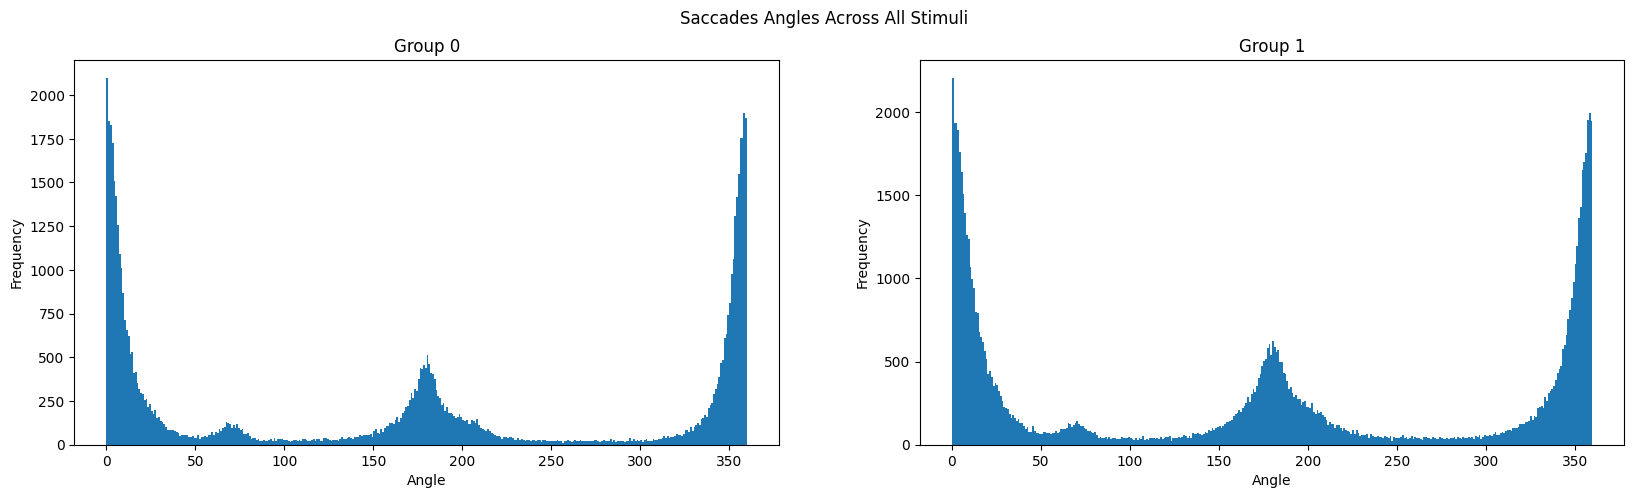

In [22]:
from scipy.stats import ttest_ind
# Initialize variables to store aggregated data
aggregated_angles = {group: [] for group in np.unique(WhichC_Munich)}

# Iterate over all stimuli
for stim in range(DyslexiaDat.np):
    groups = np.unique(WhichC_Munich)
    group_saccades = []
    
    # Collect saccades for each group
    for group in groups:
        group_saccades.append(Saccades[WhichC_Munich == group, stim, :, :])
    
    # Aggregate angles for each group
    for j, group in enumerate(group_saccades):
        for subj in group:
            for h in range(subj.shape[0]):
                for v in range(subj.shape[1]):
                    for val in subj[h, v]:
                        aggregated_angles[groups[j]].append(val)

# Plot the aggregated results
fig, ax = plt.subplots(1, len(aggregated_angles), figsize=(20, 5))
fig.suptitle('Saccades Angles Across All Stimuli')

for i, (group, angles) in enumerate(aggregated_angles.items()):
    ax[i].hist(angles, bins=360)
    ax[i].set_title(f'Group {group}')
    ax[i].set_xlabel('Angle')
    ax[i].set_ylabel('Frequency')
    print(f'Group {group}')
    print(f'Angle Entropy: {angles_entropy(angles, 360)}')
    print(f'---------------------------------------------------------')

# Perform t-test between groups
group_keys = list(aggregated_angles.keys())
t, p = ttest_ind(aggregated_angles[group_keys[0]], aggregated_angles[group_keys[1]])
print(' ')
print(f't-test between groups {group_keys[0]} and {group_keys[1]}')
print(f't: {t}, p: {p}')
print(' ')

plt.show()


In [23]:
# create a list of subjects from 117 to 200
GrazSubs = DyslexiaDat.subjects[117:200]
GrazSubs_Idx = list(range(117,200))
MunichSubs_Idx = list(range(0,117))

In [24]:
# SimVals[subjects][group]
def calculate_accuracy(SimVals, WhichCN, Idx):
    correct_labels = 0

    for i, subj in enumerate(Idx):
        # Calculate the mean for each group for the current subject
        predicted_group = 0
        min_mean = np.inf
        for j in range(np.unique(WhichCN).size):
            if len(SimVals[i][j]) > 0:
                mean = np.mean(SimVals[i][j])
            else:
                continue
            if mean <= min_mean:
                min_mean = mean
                predicted_group = j
        
        # Check if the predicted group matches the true group
        if predicted_group == WhichCN[subj]:
            correct_labels += 1
    
    # Calculate accuracy
    accuracy = correct_labels / len(Idx)
    print(f'Accuracy: {accuracy * 100:.2f}%')

In [25]:
stimn = 28

In [26]:
SaccadeObj = DyslexiaDat.GetSaccades()
Saccades = DyslexiaDat.SaccadeSingleSel(SaccadeObj, nHor=1, stim=stimn, nVer=0, InferS=False)
SimVals = DyslexiaDat.SacSimSubj2Group(Saccades, WhichCN, MunichSubs_Idx, method='peak180',  match=False, nosubj=GrazSubs_Idx)

In [27]:
calculate_accuracy(SimVals, WhichCN, MunichSubs_Idx)

Accuracy: 50.43%


In [28]:
SaccadeObj = DyslexiaDat.GetSaccades()
Saccades = DyslexiaDat.SaccadeSingleSel(SaccadeObj, nHor=1, stim=stimn, nVer=20, InferS=False)
SimVals = DyslexiaDat.SacSimSubj2Group(Saccades, WhichCN, MunichSubs_Idx, method='peak180',  match=False, nosubj=GrazSubs_Idx)

In [29]:
calculate_accuracy(SimVals, WhichCN, MunichSubs_Idx)

Accuracy: 52.99%


---

In [30]:
SaccadeObj = DyslexiaDat.GetSaccades()
Saccades = DyslexiaDat.SaccadeSingleSel(SaccadeObj, nHor=1, stim=stimn, nVer=1, InferS=False)
SimVals = DyslexiaDat.SacSimSubj2Group(Saccades, WhichCN, MunichSubs_Idx, method='peak180',  match=True, nosubj=GrazSubs_Idx)

In [31]:
calculate_accuracy(SimVals, WhichCN, MunichSubs_Idx)

Accuracy: 68.38%


In [32]:
SaccadeObj = DyslexiaDat.GetSaccades()
Saccades = DyslexiaDat.SaccadeSingleSel(SaccadeObj, nHor=1, stim=stimn, nVer=20, InferS=False)
SimVals = DyslexiaDat.SacSimSubj2Group(Saccades, WhichCN, MunichSubs_Idx, method='peak180',  match=True, nosubj=GrazSubs_Idx)

In [33]:
calculate_accuracy(SimVals, WhichCN, MunichSubs_Idx)

Accuracy: 52.99%


---

## MLP

We define a multilayer perceptron (MLP) to train over specific features extracted from the data.

In [34]:
import torch
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix
from IPython.utils import io
import numpy as np
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler

In [35]:
list(set_subj)

[2,
 8,
 10,
 14,
 15,
 17,
 20,
 25,
 27,
 32,
 41,
 43,
 44,
 53,
 55,
 58,
 64,
 66,
 73,
 76,
 80,
 82,
 83,
 91,
 94,
 96,
 99,
 115,
 116]

In [36]:
from scipy.stats import entropy
def get_entropy(self, subj, stim):
    # get fixation (array([x]), array([y]))
    fixations = DyslexiaDat.GetFixationData(DyslexiaDat.subjects[subj], DyslexiaDat.stimuli[stim])
    # calculate entropy of the fixation distribution
    sizeX = self.x_size
    sizeY = self.y_size
    x = fixations[0].tolist()
    y = fixations[1].tolist()
    # create a 2D histogram
    H, xedges, yedges = np.histogram2d(x, y, bins=(sizeX, sizeY))
    # normalize the histogram
    H = H / H.sum()
    # calculate entropy
    ent = entropy(H.flatten())
    return ent

In [37]:
def GlobalFeature(self, Saccades, stim):
    Features = np.empty((self.ns), dtype=object)
    for s in range(self.ns):
        angles = []
        progressive_s = 0
        regressive_s = 0
        for saccade in Saccades[s][stim]:
            angles.append(saccade.Angle())
            if saccade.Angle() > 270 or saccade.Angle() < 90:
                progressive_s += 1
            elif saccade.Angle() > 90 and saccade.Angle() < 270:
                regressive_s += 1
        
        fix_durations = DyslexiaDat.GetDurations(DyslexiaDat.subjects[s], DyslexiaDat.stimuli[stim])

        Features[s] = {'number_fixation':  self.nfixations[s][stim],
                       'fixation_entropy': get_entropy(self, s, stim),
                       'mean_fixation_duration': np.mean(fix_durations),
                       'std_fixation_duration': np.std(fix_durations),
                       'total_reading_duration': np.sum(fix_durations),
                       'mean_saccade_amplitude': np.mean(angles),
                       'std_saccade_amplitude': np.std(angles),
                       'regression': regressive_s,
                       'progression/regression': regressive_s if regressive_s == 0 else progressive_s/regressive_s
                        }
    return Features

In [38]:
stimuli = list(range(0, 30))

In [39]:
GlobalFeature_array = []
Saccades = DyslexiaDat.GetSaccades()
for stim in stimuli:
    GlobalFeature_array.append(GlobalFeature(DyslexiaDat, Saccades, stim))
    print(f'Global features for stimulus {stim+1} calculated')

C:\Users\Utente\AppData\Local\Temp\ipykernel_29256\641606591.py:13: RuntimeWarning: invalid value encountered in divide
  H = H / H.sum()
c:\ProgramData\anaconda3\envs\eyesim\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\ProgramData\anaconda3\envs\eyesim\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\ProgramData\anaconda3\envs\eyesim\Lib\site-packages\numpy\core\_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\ProgramData\anaconda3\envs\eyesim\Lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c:\ProgramData\anaconda3\envs\eyesim\Lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered i

Global features for stimulus 1 calculated
Global features for stimulus 2 calculated
Global features for stimulus 3 calculated
Global features for stimulus 4 calculated
Global features for stimulus 5 calculated
Global features for stimulus 6 calculated
Global features for stimulus 7 calculated
Global features for stimulus 8 calculated
Global features for stimulus 9 calculated
Global features for stimulus 10 calculated
Global features for stimulus 11 calculated
Global features for stimulus 12 calculated
Global features for stimulus 13 calculated
Global features for stimulus 14 calculated
Global features for stimulus 15 calculated
Global features for stimulus 16 calculated
Global features for stimulus 17 calculated
Global features for stimulus 18 calculated
Global features for stimulus 19 calculated
Global features for stimulus 20 calculated
Global features for stimulus 21 calculated
Global features for stimulus 22 calculated
Global features for stimulus 23 calculated
Global features for 

In [40]:
SaccadeObj = DyslexiaDat.GetSaccades()

In [41]:
Saccade = DyslexiaDat.SaccadeSel(SaccadeObj, nHor=1, nVer=1)

In [42]:
Saccade.shape

(200, 36, 1, 1)

In [43]:
SimMatrix = DyslexiaDat.SacSim1Group(Saccade, method='peak180', match=True, Thr=0)

In [44]:
SimMatrix.shape

(200, 200, 36, 1, 1)

In [45]:
from PyEyeSim.scanpathsimhelper import CreatAoiRects

AOIRects = CreatAoiRects(1, 1, DyslexiaDat.x_size, DyslexiaDat.y_size, allsame=DyslexiaDat.np)

In [46]:
Features = np.empty((DyslexiaDat.ns, len(stimuli),  1, 1), dtype=object)
for stim in stimuli:
    Features[:,stim,:,:] = DyslexiaDat.FeatureExtraction(SaccadeObj, Saccade[:,stim,:,:], nHor=1, stim=stim, nVer=1, AOIRects=AOIRects)
    print(f'Features for stimulus {stim+1} calculated')

C:\Users\Utente\Documents\University\Master\PyEyeSim\PyEyeSim\_scanpathsim.py:727: RuntimeWarning: Mean of empty slice
  'mean_fixation_duration': np.nanmean(duration),


Features for stimulus 1 calculated
Features for stimulus 2 calculated
Features for stimulus 3 calculated
Features for stimulus 4 calculated
Features for stimulus 5 calculated
Features for stimulus 6 calculated
Features for stimulus 7 calculated
Features for stimulus 8 calculated
Features for stimulus 9 calculated
Features for stimulus 10 calculated
Features for stimulus 11 calculated
Features for stimulus 12 calculated
Features for stimulus 13 calculated
Features for stimulus 14 calculated
Features for stimulus 15 calculated
Features for stimulus 16 calculated
Features for stimulus 17 calculated
Features for stimulus 18 calculated
Features for stimulus 19 calculated
Features for stimulus 20 calculated
Features for stimulus 21 calculated
Features for stimulus 22 calculated
Features for stimulus 23 calculated
Features for stimulus 24 calculated
Features for stimulus 25 calculated
Features for stimulus 26 calculated
Features for stimulus 27 calculated
Features for stimulus 28 calculated
F

In [47]:
Features.shape

(200, 30, 1, 1)

In [48]:
from sklearn.model_selection import train_test_split
np.random.seed(42)
#  Calculate training and test data for different folds
train_subjects = []
test_subjects = []
training_Vals = []
labels_train = []
test_Vals = []
labels_test = []

subj = list(set(MunichSubs_Idx) - set_subj)

labels = np.array([WhichCN[sub] for sub in subj])

for i in range(100):
    train_subj, test_subj = train_test_split(
        subj, 
        test_size=0.1, 
        random_state=i,
        stratify=labels
    )

    train_subjects.append(train_subj)
    test_subjects.append(test_subj)

    remove_subj = np.append(test_subj, np.array(GrazSubs_Idx))

    # Train set
    temp = []
    for stim in stimuli:
        with io.capture_output() as _:
            SimAndFeatureVals = DyslexiaDat.SacSimSubj2GroupPlusFeature(stim, WhichCN, subjects=list(train_subj), nHor=1, nVer=1, inferS=False, method='peak180', match=True, nosubj=list(remove_subj), SaccadeObj=SaccadeObj, Saccades=Saccade[:,stim,:,:], Features=Features[:,stim,:,:], SimMatrix=SimMatrix[:,:, stim, :,:])
        temp.append(SimAndFeatureVals)
    
    training_Vals.append(temp)
    labels_train.append(np.array([WhichCN[sub] for sub in train_subj]))


    # Test set
    temp = []
    for stim in stimuli:
        with io.capture_output() as _:
            SimAndFeatureVals = DyslexiaDat.SacSimSubj2GroupPlusFeature(stim, WhichCN, subjects=list(test_subj), nHor=1, nVer=1, inferS=False, method='peak180', match=True, nosubj=list(remove_subj), SaccadeObj=SaccadeObj, Saccades=Saccade[:,stim,:,:], Features=Features[:,stim,:,:], SimMatrix=SimMatrix[:,:, stim, :,:]) 
        temp.append(SimAndFeatureVals)
    
    test_Vals.append(temp)
    labels_test.append(np.array([WhichCN[sub] for sub in test_subj]))

In [49]:
print(len(training_Vals)) # 5 folds
print(len(training_Vals[0])) # 30 stimuli
print(len(training_Vals[0][0])) # 79 train subjects so 79 values for each group
print(len(test_Vals[0][0])) # 9 test subjects

100
30
79
9


In [50]:
training_Vals[0][5][9][0][0][4] # mean saccade similarity group 0 subject with index 10 in the training list for stimulus 5 of the first fold

0.7461254762074895

---

In [51]:
def calculate_hedges_g(group1, group2):
    """
    Calculate Hedges' g effect size between two groups
    
    Parameters:
    group1, group2: arrays of observations
    
    Returns:
    hedges_g: effect size (group1_mean - group2_mean) / pooled_sd
    ci_lower, ci_upper: 95% confidence interval
    """
    n1, n2 = len(group1), len(group2)
    m1, m2 = np.mean(group1), np.mean(group2)
    s1, s2 = np.std(group1, ddof=1), np.std(group2, ddof=1)

    # Pooled standard deviation
    pooled_sd = np.sqrt(((n1-1)*s1**2 + (n2-1)*s2**2) / (n1+n2-2))
    
    # Cohen's d
    cohens_d = (m1 - m2) / pooled_sd
    
    # Correction factor for Hedges' g
    correction_factor = 1 - (3 / (4*(n1+n2-2) - 1))
    hedges_g = cohens_d * correction_factor
    
    # Standard error for Hedges' g
    se = np.sqrt((n1+n2)/(n1*n2) + hedges_g**2/(2*(n1+n2-2)))
    
    # 95% confidence interval
    ci_lower = hedges_g - 1.96 * se
    ci_upper = hedges_g + 1.96 * se
    
    return hedges_g, ci_lower, ci_upper

def create_forest_plot(effect_sizes_data, title="Eye Movement Effect Sizes"):
    """
    Create a forest plot for effect sizes
    
    Parameters:
    effect_sizes_data: dict with keys as feature names and values as (hedges_g, ci_lower, ci_upper)
    """
    
    # Prepare data for plotting
    features = list(effect_sizes_data.keys())
    hedges_g = [effect_sizes_data[feat][0] for feat in features]
    ci_lower = [effect_sizes_data[feat][1] for feat in features]
    ci_upper = [effect_sizes_data[feat][2] for feat in features]
    
    # Create figure
    fig, ax = plt.subplots(figsize=(10, 8))
    
    # Create y-axis positions
    y_pos = np.arange(len(features))
    
    # Plot confidence intervals as horizontal lines
    for i, (lower, upper) in enumerate(zip(ci_lower, ci_upper)):
        ax.plot([lower, upper], [i, i], 'k-', linewidth=1.5)
    
    # Plot effect sizes as red dots
    ax.scatter(hedges_g, y_pos, color='red', s=60, zorder=5)
    
    # Add vertical reference lines
    ax.axvline(x=0, color='black', linestyle='--', alpha=0.7, linewidth=1)
    
    # Customize the plot
    ax.set_yticks(y_pos)
    ax.set_yticklabels(features)
    ax.set_xlabel("Hedges' g (with 95% CI)", fontsize=12)
    ax.set_ylabel("Eye Movement Metric", fontsize=12)
    ax.set_title(title, fontsize=14, fontweight='bold')
    
    # Add grid
    ax.grid(True, alpha=0.3)
    
    # Add labels for interpretation
    ax.text(ax.get_xlim()[0], -0.8, "Dyslexia > Control", ha='left', fontsize=10)
    ax.text(ax.get_xlim()[1], -0.8, "Dyslexia < Control", ha='right', fontsize=10)
    
    # Add arrow
    arrow_y = -0.6
    ax.annotate('', xy=(ax.get_xlim()[1]-0.1, arrow_y), xytext=(ax.get_xlim()[0]+0.1, arrow_y),
                arrowprops=dict(arrowstyle='<->', color='black', lw=1))
    
    plt.tight_layout()
    return fig, ax

def analyze_eyetracking_data(GlobalFeature_array, dyslexia_labels):
    """
    Analyze eye-tracking data and calculate effect sizes
    
    Parameters:
    GlobalFeature_array: list with dict with feature names as keys, shape (n_stimuli, n_subjects)
    dyslexia_labels: array of labels (0 for control, 1 for dyslexia) of length n_subjects
    
    Returns:
    effect_sizes_data: dict with effect sizes and confidence intervals
    """
    
    # Map your features to more readable names (optional)
    feature_names_mapping = {
        'number_fixation': 'Number Fixations',
        'fixation_entropy': 'Fixation Entropy',
        'mean_fixation_duration': 'Fixation Duration (Mean)',
        'std_fixation_duration': 'Fixation Duration (Std)',
        'total_reading_duration': 'Total Reading Duration',
        'mean_saccade_amplitude': 'Saccade Amplitude (Mean)',
        'std_saccade_amplitude': 'Saccade Amplitude (Std)',
        'regression': 'Number Regressions',
        'progression/regression': 'Progression/Regression Ratio',
    }
    
    effect_sizes_data = {}

    feature_keys = None
    for stim in range(GlobalFeature_array.shape[0]):
        for subj in range(GlobalFeature_array.shape[1]):
            if GlobalFeature_array[stim, subj] is not None:
                feature_keys = list(GlobalFeature_array[stim, subj].keys())
                break
        if feature_keys is not None:
            break

    for feature_key in feature_keys:
        # Extract feature values for all subjects and stimuli
        feature_matrix = np.zeros((GlobalFeature_array.shape[0], GlobalFeature_array.shape[1]))
        feature_matrix[:] = np.nan  # Initialize with NaN
        
        for stim in range(GlobalFeature_array.shape[0]):
            for subj in range(GlobalFeature_array.shape[1]):
                if GlobalFeature_array[stim, subj] is not None and feature_key in GlobalFeature_array[stim, subj]:
                    feature_matrix[stim, subj] = GlobalFeature_array[stim, subj][feature_key]
        
        # Average across stimuli for each subject (ignoring NaN values)
        subject_averages = np.nanmean(feature_matrix, axis=0)
        
        # Remove subjects with all NaN values
        valid_subjects = ~np.isnan(subject_averages)
        subject_averages = subject_averages[valid_subjects]
        valid_labels = dyslexia_labels[valid_subjects]
        
        # Separate by group
        control_group = subject_averages[valid_labels == 0]
        dyslexia_group = subject_averages[valid_labels == 1]
        
        # Calculate effect size (dyslexia - control)
        hedges_g, ci_lower, ci_upper = calculate_hedges_g(control_group, dyslexia_group)

        # Use mapped name if available
        display_name = feature_names_mapping.get(feature_key, feature_key)
        effect_sizes_data[display_name] = (hedges_g, ci_lower, ci_upper)
    
    return effect_sizes_data

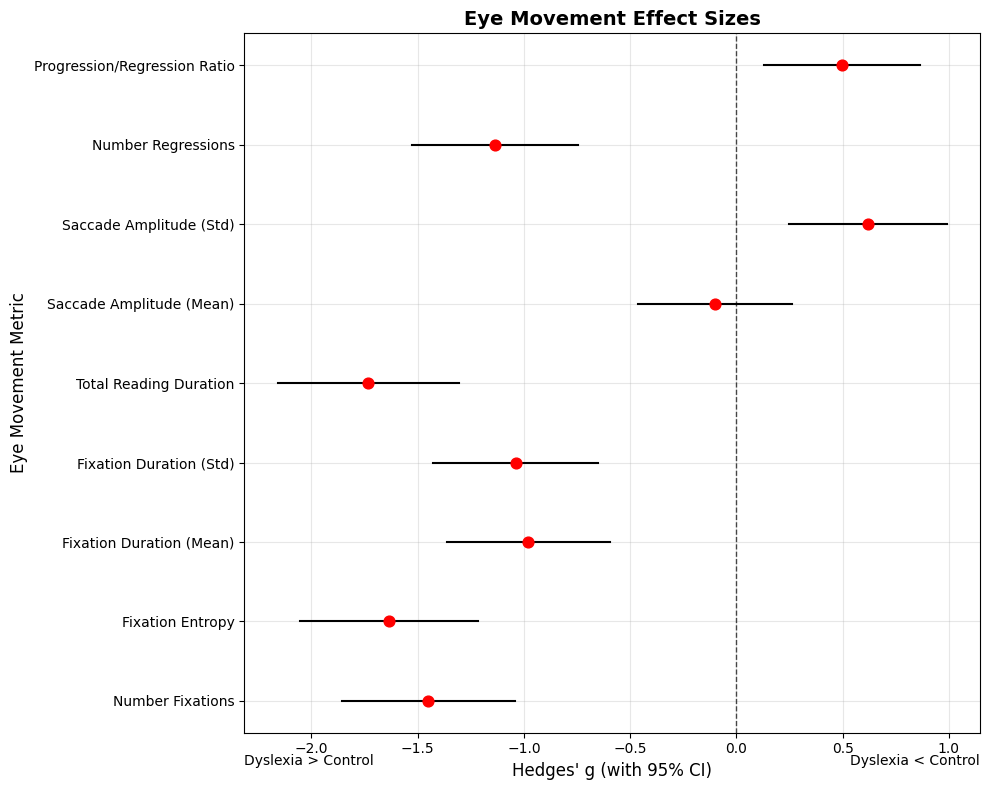

In [52]:
np.random.seed(42)

subj = list(range(0, 117))

labels = np.array([WhichCN[sub] for sub in subj])

# take global feature for all stimuli and all subjects in subj
global_f = np.zeros((len(stimuli), len(subj)), dtype=object)
for stim in range(len(stimuli)):
    for s_idx,s in enumerate(subj):
        global_f[stim, s_idx] = GlobalFeature_array[stim][s]

effect_sizes_data = analyze_eyetracking_data(global_f, labels)
fig, ax = create_forest_plot(effect_sizes_data, title="Eye Movement Effect Sizes")
plt.show()

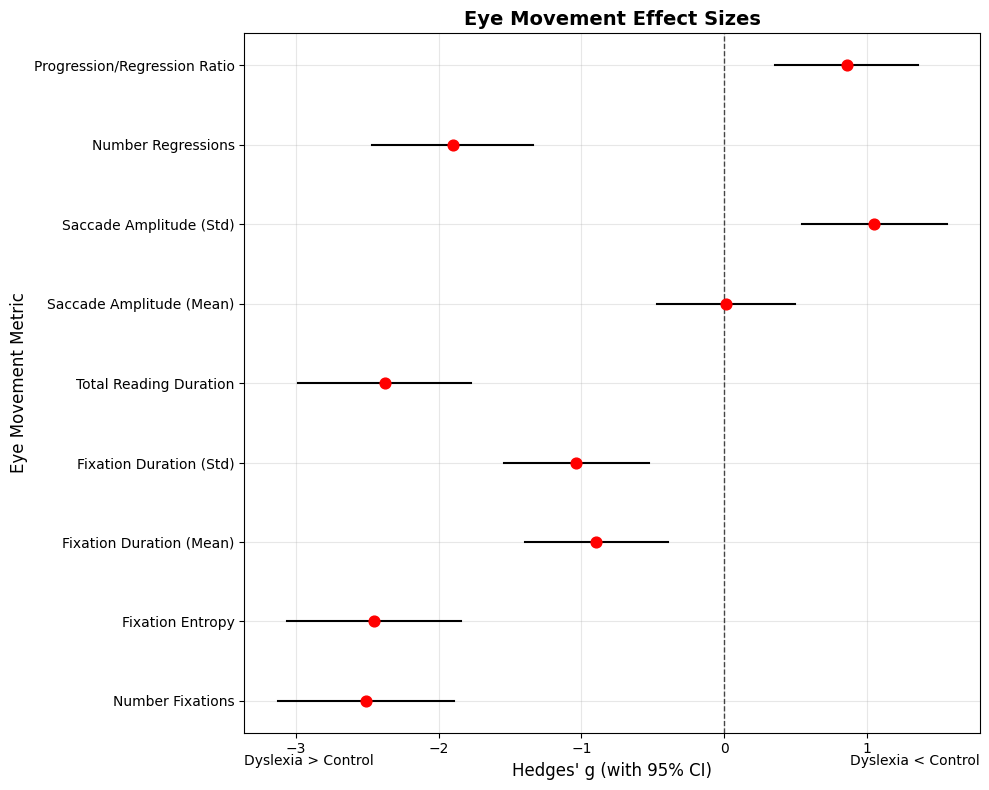

In [53]:
np.random.seed(42)

subj = list(range(117, 200))

labels = np.array([WhichCN[sub] for sub in subj])

# take global feature for all stimuli and all subjects in subj
global_f = np.zeros((len(stimuli), len(subj)), dtype=object)
for stim in range(len(stimuli)):
    for s_idx,s in enumerate(subj):
        global_f[stim, s_idx] = GlobalFeature_array[stim][s]

effect_sizes_data = analyze_eyetracking_data(global_f, labels)
fig, ax = create_forest_plot(effect_sizes_data, title="Eye Movement Effect Sizes")
plt.show()

---

In [54]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from captum.attr import IntegratedGradients

def explain_prediction(model, input_tensor, target_class=None):
    model.eval()
    
    # Ensure input has batch dimension
    if len(input_tensor.shape) == 1:
        input_tensor = input_tensor.unsqueeze(0)
    
    # Ensure input requires grad
    input_tensor = input_tensor.requires_grad_(True)
    
    ig = IntegratedGradients(model)
    
    # If target_class is None, use the predicted class
    if target_class is None:
        with torch.no_grad():
            pred = model(input_tensor)
            target_class = pred.argmax(dim=1)
    else:
        # Ensure target_class is proper tensor format
        if isinstance(target_class, (int, np.integer)):
            target_class = torch.tensor([target_class])
        elif isinstance(target_class, np.ndarray):
            target_class = torch.from_numpy(target_class)
    
    # Get attributions
    attributions, approximation_error = ig.attribute(
        input_tensor, 
        target=target_class, 
        return_convergence_delta=True
    )
    return attributions, approximation_error

def visualize_attribution_boxplot(attribution_matrix, feature_names):
    """
    Create a box plot showing the distribution of attributions across stimuli
    
    Args:
        attribution_matrix: Shape (n_features, n_stimuli) - attributions for each feature across stimuli
        feature_names: List of feature names
    """
    fig, ax = plt.subplots(figsize=(14, 8))
    
    # Create box plot
    box_data = [attribution_matrix[i, :] for i in range(len(feature_names))]
    bp = ax.boxplot(box_data, labels=feature_names, patch_artist=True, 
                    showmeans=True, meanline=True)
    
    # Color boxes based on mean attribution (red for negative, blue for positive)
    means = [np.mean(data) for data in box_data]
    for patch, mean_val in zip(bp['boxes'], means):
        if mean_val < 0:
            patch.set_facecolor('lightcoral')
        else:
            patch.set_facecolor('lightblue')
    
    # Customize the plot
    ax.set_ylabel("Attribution Score")
    ax.set_title("Feature Attribution Distribution Across Stimuli\n(Box=IQR, Whiskers=1.5×IQR, Orange=Mean, Green-Dotted=Median, White-Circle=Outliers)")
    ax.axhline(y=0, color='black', linestyle='-', alpha=0.3)  # Add zero line
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    
    # Print summary statistics
    print("\nFeature Attribution Summary:")
    print("-" * 60)
    for i, name in enumerate(feature_names):
        data = attribution_matrix[i, :]
        print(f"{name:30s}: Mean={np.mean(data):7.4f}, Std={np.std(data):7.4f}, "
              f"Min={np.min(data):7.4f}, Max={np.max(data):7.4f}")

def visualize_attribution_comparison(attribution_matrix, feature_names):
    """
    Create both bar plot (means) and box plot side by side
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
    
    # Left plot: Traditional bar plot with error bars
    means = np.mean(attribution_matrix, axis=1)
    stds = np.std(attribution_matrix, axis=1)
    colors = ['red' if x < 0 else 'blue' for x in means]
    
    ax1.barh(feature_names, means, xerr=stds, color=colors, alpha=0.7, capsize=5)
    ax1.set_xlabel("Attribution Score")
    ax1.set_title("Mean Attribution ± Std Dev")
    ax1.axvline(x=0, color='black', linestyle='-', alpha=0.3)
    
    # Right plot: Box plot
    box_data = [attribution_matrix[i, :] for i in range(len(feature_names))]
    bp = ax2.boxplot(box_data, labels=range(len(feature_names)), patch_artist=True,
                     showmeans=True, meanline=True, vert=False)
    
    # Color boxes
    for patch, mean_val in zip(bp['boxes'], means):
        if mean_val < 0:
            patch.set_facecolor('lightcoral')
        else:
            patch.set_facecolor('lightblue')
    
    ax2.set_yticks(range(1, len(feature_names) + 1))
    ax2.set_yticklabels(feature_names)
    ax2.set_xlabel("Attribution Score")
    ax2.set_title("Attribution Distribution (Box Plot)")
    ax2.axvline(x=0, color='black', linestyle='-', alpha=0.3)
    
    plt.tight_layout()
    plt.show()

c:\ProgramData\anaconda3\envs\eyesim\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [55]:
def vectorize(SimAndFeatureVals, subj, stim, vec):
    vector_roi = np.zeros((len(subj), 11))
    for s, subj_id in enumerate(subj):
        # add general features
        Features = GlobalFeature_array[stim][subj_id]
        
    if vec.size != 0:
        vector_roi = np.append(vector_roi, vec, axis=1)
    return vector_roi

In [56]:
import torch
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix
from IPython.utils import io
import numpy as np
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Define the neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
    def forward(self, x): 
        return x

In [57]:
def train_test_pipeline(stimuli, momentum = 0.8):
    torch.manual_seed(42)
    np.random.seed(42)
    results = []
    accuracy = []
    conf_matrix = np.zeros((2, 2))

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Using device: {device}")

    for i in range(100):
        best_loss = np.inf

        vector_roi = np.array([])
        for idx, _ in enumerate(stimuli):
            vector_roi = vectorize(training_Vals[i][idx], subj=train_subjects[i], stim=idx, vec=vector_roi)
            
        # apply standardization
        scaler = StandardScaler()
        vector_roi = scaler.fit_transform(vector_roi)

        # Train set
        X_train = torch.tensor(vector_roi, dtype=torch.float32).to(device)
        y_train = torch.tensor(labels_train[i], dtype=torch.long).to(device) 

        vector_roi = np.array([])
        for idx, _ in enumerate(stimuli):
            vector_roi = vectorize(test_Vals[i][idx], subj=test_subjects[i], stim=idx, vec=vector_roi)
        
        # apply standardization
        scaler = StandardScaler()
        vector_roi = scaler.fit_transform(vector_roi)
        # Test set
        X_test = torch.tensor(vector_roi, dtype=torch.float32).to(device)
        y_test = torch.tensor(labels_test[i], dtype=torch.long).to(device) 

        # Initialize the model, loss function, and optimizer
        model = NN().to(device)
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.SGD(model.parameters(), lr=0.2, momentum=momentum)

        # Train the model
        model.train()
        for epoch in range(20):  # number of epochs
            optimizer.zero_grad()
            outputs = model(X_train)
            loss = criterion(outputs, y_train)
            loss.backward()
            optimizer.step()
            # print loss every 5 epochs
            if epoch % 5 == 0:
                print(f'Epoch {epoch} loss: {loss.item()}')

            if loss < best_loss:
                # save checkpoint
                checkpoint = {'model': model, 'state_dict': model.state_dict(), 'optimizer': optimizer.state_dict()}
                best_loss = loss

        # Load the best model
        model.load_state_dict(checkpoint['state_dict'])
        model.eval()
        with torch.no_grad():
            outputs = model(X_test)
            predictions = torch.argmax(outputs, dim=1)  # Take the class with highest probability
            accuracy.append(accuracy_score(y_test.cpu(), predictions.cpu()))
            conf_matrix += confusion_matrix(y_test.cpu(), predictions.cpu())
        # Save data
        results.append({
            'model': model,
            'X_train': X_train,
            'y_train': y_train,
            'X_test': X_test,
            'y_test': y_test,
            'predictions': predictions.cpu().numpy(),
            'accuracy': accuracy[-1],
            'conf_matrix': conf_matrix
        })

    # Results
    accuracy = np.array(accuracy)
    print(f'Average accuracy: {np.mean(accuracy)}')
    print(f'Standard deviation: {np.std(accuracy)}')
    print(f'Total confusion matrix:\n{conf_matrix}')
    print(f'False positives: {conf_matrix[0, 1]}')
    print(f'False negatives: {conf_matrix[1, 0]}')

    return results

#### Original and Similarity features (Avg + Std)

In [58]:
def vectorize(SimAndFeatureVals, subj, stim, vec):
    vector_roi = np.zeros((len(subj), 11))
    for s, subj_id in enumerate(subj):
        # add general features
        Features = GlobalFeature_array[stim][subj_id]
        vector_roi[s][0] = Features['number_fixation']
        vector_roi[s][1] = Features['mean_saccade_amplitude']
        vector_roi[s][2] = Features['mean_fixation_duration']
        vector_roi[s][3] = Features['total_reading_duration']
        vector_roi[s][4] = Features['regression']
        vector_roi[s][5] = Features['progression/regression']
        vector_roi[s][6] = SimAndFeatureVals[s][0][0][3] # landing of the first coordinate
        vector_roi[s][7] = SimAndFeatureVals[s][0][0][4] # mean saccade similarity group 0
        vector_roi[s][8] = SimAndFeatureVals[s][0][0][5] # mean saccade similarity group 1
        vector_roi[s][9] = SimAndFeatureVals[s][0][0][6] # std saccade similarity group 0
        vector_roi[s][10] = SimAndFeatureVals[s][0][0][7] # std saccade similarity group 1

    if vec.size != 0:
        vector_roi = np.append(vector_roi, vec, axis=1)
    return vector_roi

In [59]:
torch.manual_seed(42)
np.random.seed(42)

# Define the neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(330, 165)
        self.dropout1 = nn.Dropout(p=0.2)  
        self.fc2 = nn.Linear(165, 83)
        self.dropout2 = nn.Dropout(p=0.2)
        self.fc3 = nn.Linear(83, 42) 
        self.dropout3 = nn.Dropout(p=0.2)
        self.fc4 = nn.Linear(42, 2)
        self.softmax = nn.Softmax(dim=1)

        # Initialize weights using Xavier uniform
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)
        nn.init.xavier_uniform_(self.fc4.weight)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout3(x)
        x = self.softmax(self.fc4(x)) 
        return x

In [60]:
results = train_test_pipeline(stimuli)

Using device: cuda
Epoch 0 loss: 0.712942361831665
Epoch 5 loss: 0.3847809433937073
Epoch 10 loss: 0.33159300684928894
Epoch 15 loss: 0.3199031949043274
Epoch 0 loss: 0.7134718298912048
Epoch 5 loss: 0.39277029037475586
Epoch 10 loss: 0.3389908969402313
Epoch 15 loss: 0.3291638493537903
Epoch 0 loss: 0.7189401388168335
Epoch 5 loss: 0.39655601978302
Epoch 10 loss: 0.32518839836120605
Epoch 15 loss: 0.31398841738700867
Epoch 0 loss: 0.7367016673088074
Epoch 5 loss: 0.40442541241645813
Epoch 10 loss: 0.33104395866394043
Epoch 15 loss: 0.3175244927406311
Epoch 0 loss: 0.6801334619522095
Epoch 5 loss: 0.41791629791259766
Epoch 10 loss: 0.3523024916648865
Epoch 15 loss: 0.3273455500602722
Epoch 0 loss: 0.719441294670105
Epoch 5 loss: 0.4259079098701477
Epoch 10 loss: 0.3572414815425873
Epoch 15 loss: 0.3235645592212677
Epoch 0 loss: 0.7731407880783081
Epoch 5 loss: 0.39786770939826965
Epoch 10 loss: 0.3303355276584625
Epoch 15 loss: 0.32143452763557434
Epoch 0 loss: 0.7098341584205627
Epoch

In [61]:
_ = train_test_pipeline(stimuli, 0.5)

Using device: cuda
Epoch 0 loss: 0.712942361831665
Epoch 5 loss: 0.39921531081199646
Epoch 10 loss: 0.3549092710018158
Epoch 15 loss: 0.3338465690612793
Epoch 0 loss: 0.7134718298912048
Epoch 5 loss: 0.4168526232242584
Epoch 10 loss: 0.3513486385345459
Epoch 15 loss: 0.3497712314128876
Epoch 0 loss: 0.7189401388168335
Epoch 5 loss: 0.4118120074272156
Epoch 10 loss: 0.3465452492237091
Epoch 15 loss: 0.3239803612232208
Epoch 0 loss: 0.7367016673088074
Epoch 5 loss: 0.43671244382858276
Epoch 10 loss: 0.36628487706184387
Epoch 15 loss: 0.34264814853668213
Epoch 0 loss: 0.6801334619522095
Epoch 5 loss: 0.440236359834671
Epoch 10 loss: 0.37697461247444153
Epoch 15 loss: 0.3357459604740143
Epoch 0 loss: 0.719441294670105
Epoch 5 loss: 0.45744791626930237
Epoch 10 loss: 0.3740594685077667
Epoch 15 loss: 0.3452310562133789
Epoch 0 loss: 0.7731407880783081
Epoch 5 loss: 0.423414021730423
Epoch 10 loss: 0.34581440687179565
Epoch 15 loss: 0.33531513810157776
Epoch 0 loss: 0.7098341584205627
Epoch 

Approximation Error: -0.00022455268481280655 (< 0.05 is good)

FEATURE ANALYSIS


C:\Users\Utente\AppData\Local\Temp\ipykernel_29256\2144360451.py:50: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(box_data, labels=feature_names, patch_artist=True,


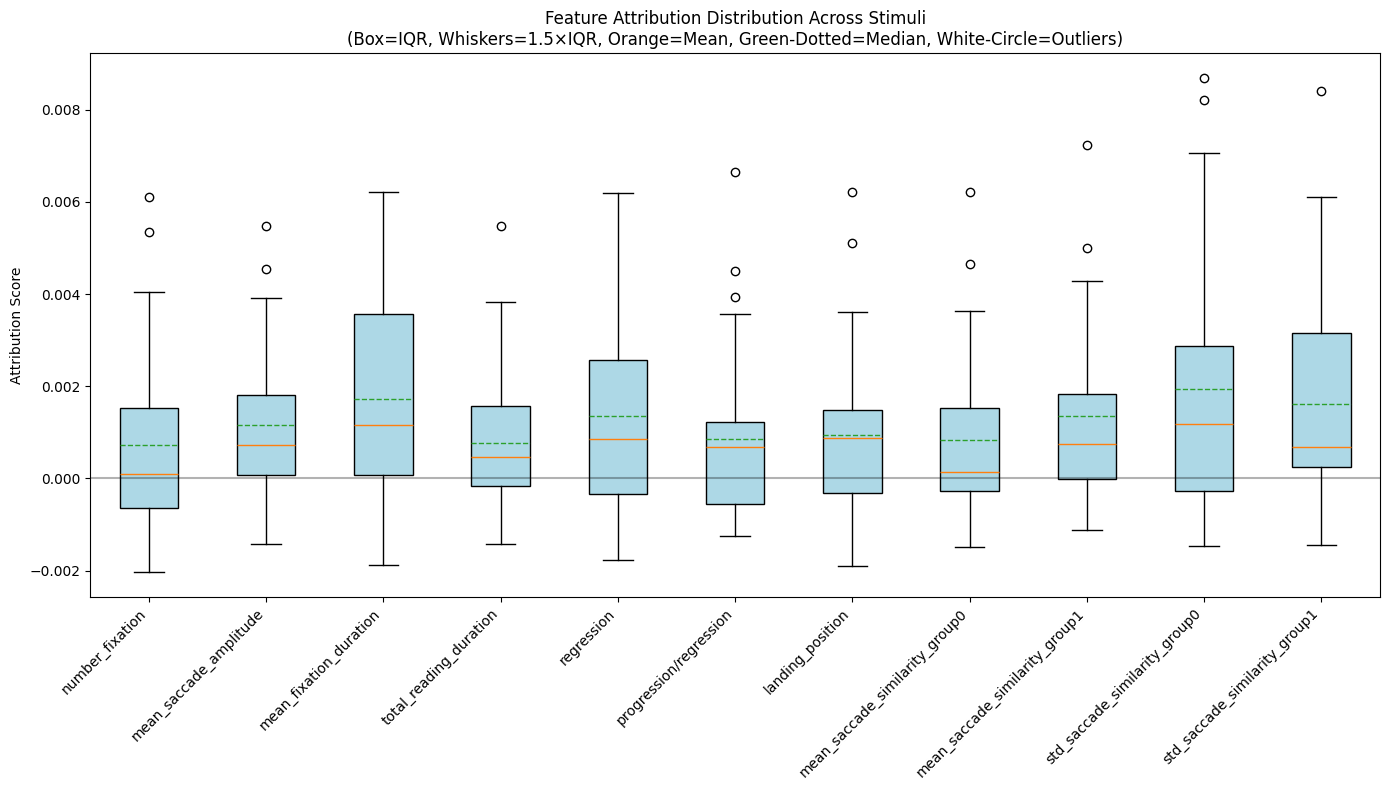


Feature Attribution Summary:
------------------------------------------------------------
number_fixation               : Mean= 0.0007, Std= 0.0020, Min=-0.0020, Max= 0.0061
mean_saccade_amplitude        : Mean= 0.0012, Std= 0.0017, Min=-0.0014, Max= 0.0055
mean_fixation_duration        : Mean= 0.0017, Std= 0.0020, Min=-0.0019, Max= 0.0062
total_reading_duration        : Mean= 0.0008, Std= 0.0016, Min=-0.0014, Max= 0.0055
regression                    : Mean= 0.0013, Std= 0.0021, Min=-0.0018, Max= 0.0062
progression/regression        : Mean= 0.0009, Std= 0.0018, Min=-0.0012, Max= 0.0066
landing_position              : Mean= 0.0009, Std= 0.0017, Min=-0.0019, Max= 0.0062
mean_saccade_similarity_group0: Mean= 0.0008, Std= 0.0018, Min=-0.0015, Max= 0.0062
mean_saccade_similarity_group1: Mean= 0.0014, Std= 0.0019, Min=-0.0011, Max= 0.0072
std_saccade_similarity_group0 : Mean= 0.0019, Std= 0.0029, Min=-0.0015, Max= 0.0087
std_saccade_similarity_group1 : Mean= 0.0016, Std= 0.0023, Min=-0.001

In [62]:
feature_names = [
    "number_fixation",
    "mean_saccade_amplitude",
    "mean_fixation_duration",
    "total_reading_duration",
    "regression",
    "progression/regression",
    "landing_position",
    "mean_saccade_similarity_group0",
    "mean_saccade_similarity_group1",
    "std_saccade_similarity_group0",
    "std_saccade_similarity_group1"
]
num_stimuli = 30
attributions = []
errors = []

for i in range(len(results)):
    input_tensor = results[i]['X_test']
    target_class = results[i]['y_test']

    att, err = explain_prediction(results[i]['model'], input_tensor, target_class)
    attributions.append(att.squeeze().cpu().detach().numpy())
    errors.append(err.cpu().numpy())

# Average across folds
attributions = np.array(attributions)
attributions = attributions.mean(axis=0)  # Average across folds if needed

if len(attributions.shape) > 1:
    attributions = np.mean(attributions, axis=0)  # Average across subjects if needed

# Reshape to get attribution matrix (features x stimuli)
attribution_matrix = attributions.reshape(len(feature_names), num_stimuli)

print(f"Approximation Error: {np.mean(errors)} (< 0.05 is good)")

# Create visualizations
print("\n" + "="*60)
print("FEATURE ANALYSIS")
print("="*60)

# Box plot visualization
visualize_attribution_boxplot(attribution_matrix, feature_names)

#### Original and Avg Similarity features

In [63]:
def vectorize(SimAndFeatureVals, subj, stim, vec):
    vector_roi = np.zeros((len(subj), 9))
    for s, subj_id in enumerate(subj):
        # add general features
        Features = GlobalFeature_array[stim][subj_id]
        vector_roi[s][0] = Features['number_fixation']
        vector_roi[s][1] = Features['mean_saccade_amplitude']
        vector_roi[s][2] = Features['mean_fixation_duration']
        vector_roi[s][3] = Features['total_reading_duration']
        vector_roi[s][4] = Features['regression']
        vector_roi[s][5] = Features['progression/regression']
        vector_roi[s][6] = SimAndFeatureVals[s][0][0][3] # landing of the first coordinate
        vector_roi[s][7] = SimAndFeatureVals[s][0][0][4] # mean saccade similarity group 0
        vector_roi[s][8] = SimAndFeatureVals[s][0][0][5] # mean saccade similarity group 1

    if vec.size != 0:
        vector_roi = np.append(vector_roi, vec, axis=1)
    return vector_roi

In [64]:
import torch
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix
from IPython.utils import io
import numpy as np
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

torch.manual_seed(42)
np.random.seed(42)

# Define the neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(270, 130)
        self.dropout1 = nn.Dropout(p=0.2)  
        self.fc2 = nn.Linear(130, 65)
        self.dropout2 = nn.Dropout(p=0.2)
        self.fc3 = nn.Linear(65, 33) 
        self.dropout3 = nn.Dropout(p=0.2)
        self.fc4 = nn.Linear(33, 2)
        self.softmax = nn.Softmax(dim=1)

        # Initialize weights using Xavier uniform
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)
        nn.init.xavier_uniform_(self.fc4.weight)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout3(x)
        x = self.softmax(self.fc4(x)) 
        return x
    
results = train_test_pipeline(stimuli)

Using device: cuda
Epoch 0 loss: 0.7487967014312744
Epoch 5 loss: 0.4194302260875702
Epoch 10 loss: 0.3511630594730377
Epoch 15 loss: 0.3190111815929413
Epoch 0 loss: 0.7202662229537964
Epoch 5 loss: 0.40710097551345825
Epoch 10 loss: 0.3554385304450989
Epoch 15 loss: 0.32675519585609436
Epoch 0 loss: 0.7018250226974487
Epoch 5 loss: 0.3943993151187897
Epoch 10 loss: 0.3298569321632385
Epoch 15 loss: 0.32247933745384216
Epoch 0 loss: 0.7347156405448914
Epoch 5 loss: 0.4089670777320862
Epoch 10 loss: 0.34558913111686707
Epoch 15 loss: 0.3307063579559326
Epoch 0 loss: 0.780555784702301
Epoch 5 loss: 0.4408819079399109
Epoch 10 loss: 0.3342669904232025
Epoch 15 loss: 0.321998655796051
Epoch 0 loss: 0.7378875017166138
Epoch 5 loss: 0.40389129519462585
Epoch 10 loss: 0.3582054376602173
Epoch 15 loss: 0.3284725248813629
Epoch 0 loss: 0.7190458178520203
Epoch 5 loss: 0.3976837396621704
Epoch 10 loss: 0.3499421775341034
Epoch 15 loss: 0.3291098177433014
Epoch 0 loss: 0.6721490025520325
Epoch 5

In [65]:
_ = train_test_pipeline(stimuli, 0.5)

Using device: cuda
Epoch 0 loss: 0.7487967014312744
Epoch 5 loss: 0.4472316801548004
Epoch 10 loss: 0.3916849195957184
Epoch 15 loss: 0.3605588972568512
Epoch 0 loss: 0.7202662229537964
Epoch 5 loss: 0.4357857406139374
Epoch 10 loss: 0.3858156204223633
Epoch 15 loss: 0.3427935838699341
Epoch 0 loss: 0.7018250226974487
Epoch 5 loss: 0.41374471783638
Epoch 10 loss: 0.35365429520606995
Epoch 15 loss: 0.33423933386802673
Epoch 0 loss: 0.7347156405448914
Epoch 5 loss: 0.44706228375434875
Epoch 10 loss: 0.38005080819129944
Epoch 15 loss: 0.3497307598590851
Epoch 0 loss: 0.780555784702301
Epoch 5 loss: 0.4583539366722107
Epoch 10 loss: 0.35761767625808716
Epoch 15 loss: 0.34504666924476624
Epoch 0 loss: 0.7378875017166138
Epoch 5 loss: 0.42912790179252625
Epoch 10 loss: 0.38234221935272217
Epoch 15 loss: 0.35525208711624146
Epoch 0 loss: 0.7190458178520203
Epoch 5 loss: 0.4245870113372803
Epoch 10 loss: 0.3681364953517914
Epoch 15 loss: 0.34028011560440063
Epoch 0 loss: 0.6721490025520325
Epo

Approximation Error: -0.00011898072261828929 (< 0.05 is good)

FEATURE ANALYSIS


C:\Users\Utente\AppData\Local\Temp\ipykernel_29256\2144360451.py:50: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(box_data, labels=feature_names, patch_artist=True,


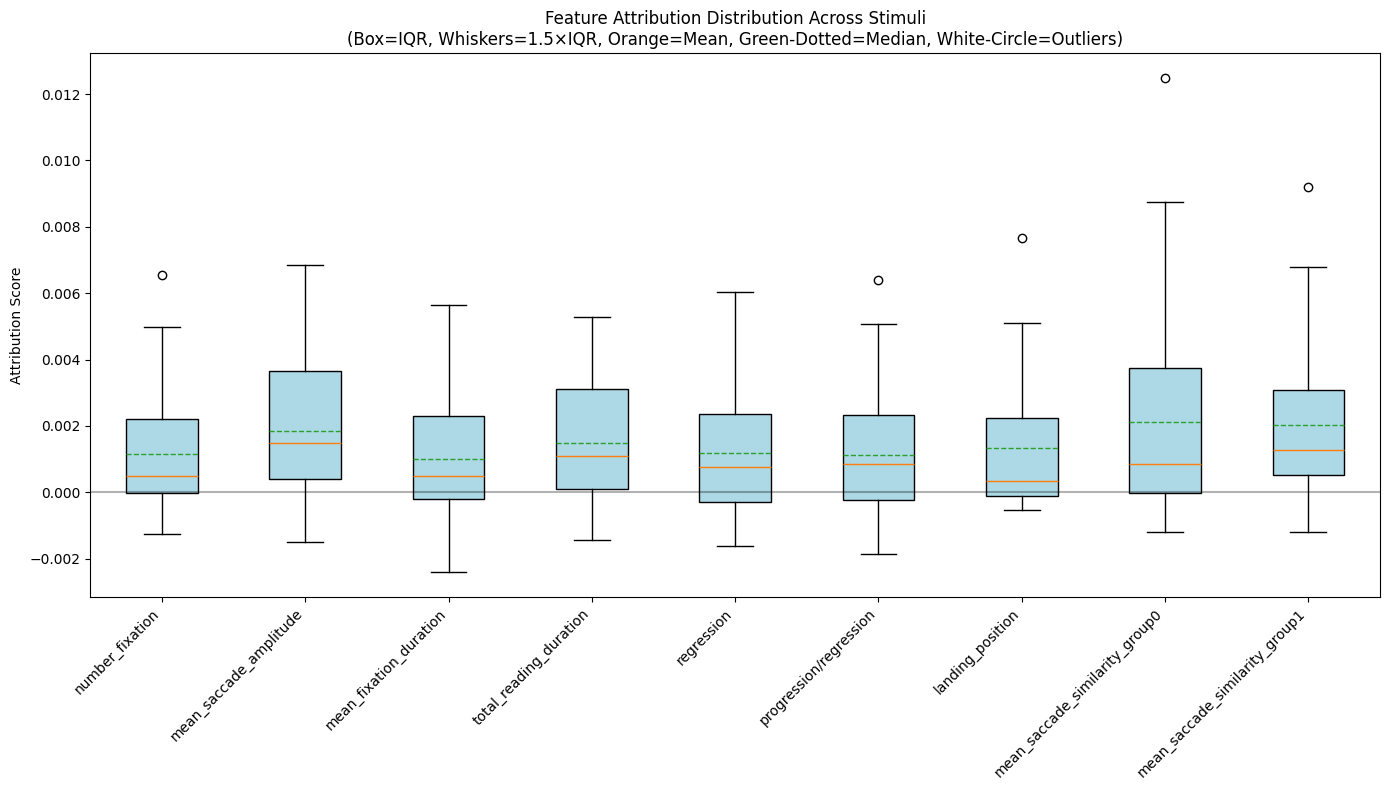


Feature Attribution Summary:
------------------------------------------------------------
number_fixation               : Mean= 0.0012, Std= 0.0019, Min=-0.0013, Max= 0.0066
mean_saccade_amplitude        : Mean= 0.0019, Std= 0.0022, Min=-0.0015, Max= 0.0068
mean_fixation_duration        : Mean= 0.0010, Std= 0.0018, Min=-0.0024, Max= 0.0056
total_reading_duration        : Mean= 0.0015, Std= 0.0019, Min=-0.0014, Max= 0.0053
regression                    : Mean= 0.0012, Std= 0.0020, Min=-0.0016, Max= 0.0060
progression/regression        : Mean= 0.0011, Std= 0.0019, Min=-0.0018, Max= 0.0064
landing_position              : Mean= 0.0013, Std= 0.0020, Min=-0.0005, Max= 0.0077
mean_saccade_similarity_group0: Mean= 0.0021, Std= 0.0030, Min=-0.0012, Max= 0.0125
mean_saccade_similarity_group1: Mean= 0.0020, Std= 0.0025, Min=-0.0012, Max= 0.0092


In [66]:
feature_names = [
    "number_fixation",
    "mean_saccade_amplitude",
    "mean_fixation_duration",
    "total_reading_duration",
    "regression",
    "progression/regression",
    "landing_position",
    "mean_saccade_similarity_group0",
    "mean_saccade_similarity_group1",
]
num_stimuli = 30
attributions = []
errors = []

for i in range(len(results)):
    input_tensor = results[i]['X_test']
    target_class = results[i]['y_test']

    att, err = explain_prediction(results[i]['model'], input_tensor, target_class)
    attributions.append(att.squeeze().cpu().detach().numpy())
    errors.append(err.cpu().numpy())

# Average across folds
attributions = np.array(attributions)
attributions = attributions.mean(axis=0)  # Average across folds if needed

if len(attributions.shape) > 1:
    attributions = np.mean(attributions, axis=0)  # Average across subjects if needed

# Reshape to get attribution matrix (features x stimuli)
attribution_matrix = attributions.reshape(len(feature_names), num_stimuli)

print(f"Approximation Error: {np.mean(errors)} (< 0.05 is good)")

# Create visualizations
print("\n" + "="*60)
print("FEATURE ANALYSIS")
print("="*60)

# Box plot visualization
visualize_attribution_boxplot(attribution_matrix, feature_names)

#### Original and Avg Similarity features (no mean saccade amplitude)

In [67]:
def vectorize(SimAndFeatureVals, subj, stim, vec):
    vector_roi = np.zeros((len(subj), 8))
    for s, subj_id in enumerate(subj):
        # add general features
        Features = GlobalFeature_array[stim][subj_id]
        vector_roi[s][0] = Features['number_fixation']
        vector_roi[s][1] = Features['mean_fixation_duration']
        vector_roi[s][2] = Features['total_reading_duration']
        vector_roi[s][3] = Features['regression']
        vector_roi[s][4] = Features['progression/regression']
        vector_roi[s][5] = SimAndFeatureVals[s][0][0][3]
        vector_roi[s][6] = SimAndFeatureVals[s][0][0][4]
        vector_roi[s][7] = SimAndFeatureVals[s][0][0][5]

    if vec.size != 0:
        vector_roi = np.append(vector_roi, vec, axis=1)
    return vector_roi

In [68]:
import torch
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix
from IPython.utils import io
import numpy as np
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

torch.manual_seed(42)
np.random.seed(42)

# Define the neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(240, 120)
        self.dropout1 = nn.Dropout(p=0.2)  
        self.fc2 = nn.Linear(120, 60)
        self.dropout2 = nn.Dropout(p=0.2)
        self.fc3 = nn.Linear(60, 30) 
        self.dropout3 = nn.Dropout(p=0.2)
        self.fc4 = nn.Linear(30, 2)
        self.softmax = nn.Softmax(dim=1)

        # Initialize weights using Xavier uniform
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)
        nn.init.xavier_uniform_(self.fc4.weight)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout3(x)
        x = self.softmax(self.fc4(x)) 
        return x
    
results = train_test_pipeline(stimuli)

Using device: cuda
Epoch 0 loss: 0.787090539932251
Epoch 5 loss: 0.4320722222328186
Epoch 10 loss: 0.3649302124977112
Epoch 15 loss: 0.3327428102493286
Epoch 0 loss: 0.6858005523681641
Epoch 5 loss: 0.4207720160484314
Epoch 10 loss: 0.33452197909355164
Epoch 15 loss: 0.33862805366516113
Epoch 0 loss: 0.7300988435745239
Epoch 5 loss: 0.4051066040992737
Epoch 10 loss: 0.3435359299182892
Epoch 15 loss: 0.3293208181858063
Epoch 0 loss: 0.6849057078361511
Epoch 5 loss: 0.41376882791519165
Epoch 10 loss: 0.331694096326828
Epoch 15 loss: 0.3429690897464752
Epoch 0 loss: 0.7180237770080566
Epoch 5 loss: 0.41066694259643555
Epoch 10 loss: 0.37727171182632446
Epoch 15 loss: 0.3171079754829407
Epoch 0 loss: 0.6880136728286743
Epoch 5 loss: 0.3757599890232086
Epoch 10 loss: 0.3502052128314972
Epoch 15 loss: 0.3437645137310028
Epoch 0 loss: 0.794978678226471
Epoch 5 loss: 0.40765514969825745
Epoch 10 loss: 0.35804298520088196
Epoch 15 loss: 0.34076443314552307
Epoch 0 loss: 0.7466811537742615
Epoch

In [69]:
_ = train_test_pipeline(stimuli, 0.5)

Using device: cuda
Epoch 0 loss: 0.787090539932251
Epoch 5 loss: 0.457470178604126
Epoch 10 loss: 0.3892159163951874
Epoch 15 loss: 0.35142314434051514
Epoch 0 loss: 0.6858005523681641
Epoch 5 loss: 0.44406238198280334
Epoch 10 loss: 0.36402198672294617
Epoch 15 loss: 0.36359208822250366
Epoch 0 loss: 0.7300988435745239
Epoch 5 loss: 0.4321427643299103
Epoch 10 loss: 0.37059828639030457
Epoch 15 loss: 0.34893473982810974
Epoch 0 loss: 0.6849057078361511
Epoch 5 loss: 0.4485064148902893
Epoch 10 loss: 0.3591991364955902
Epoch 15 loss: 0.36889275908470154
Epoch 0 loss: 0.7180237770080566
Epoch 5 loss: 0.43245837092399597
Epoch 10 loss: 0.42903080582618713
Epoch 15 loss: 0.34059327840805054
Epoch 0 loss: 0.6880136728286743
Epoch 5 loss: 0.39111196994781494
Epoch 10 loss: 0.37899747490882874
Epoch 15 loss: 0.36734920740127563
Epoch 0 loss: 0.794978678226471
Epoch 5 loss: 0.42108020186424255
Epoch 10 loss: 0.37722450494766235
Epoch 15 loss: 0.34292635321617126
Epoch 0 loss: 0.74668115377426

Approximation Error: 0.0001679149136180058 (< 0.05 is good)

FEATURE ANALYSIS


C:\Users\Utente\AppData\Local\Temp\ipykernel_29256\2144360451.py:50: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(box_data, labels=feature_names, patch_artist=True,


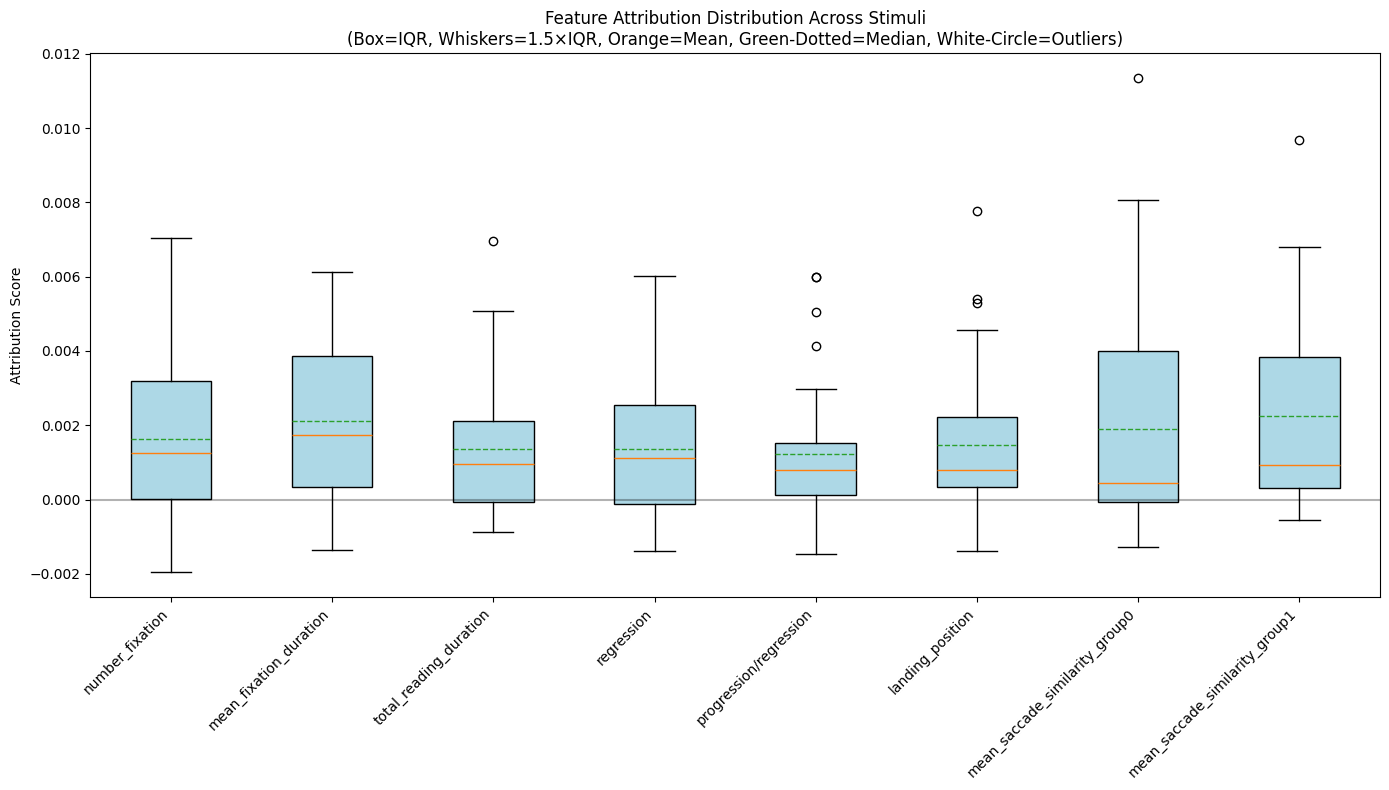


Feature Attribution Summary:
------------------------------------------------------------
number_fixation               : Mean= 0.0016, Std= 0.0021, Min=-0.0020, Max= 0.0070
mean_fixation_duration        : Mean= 0.0021, Std= 0.0020, Min=-0.0013, Max= 0.0061
total_reading_duration        : Mean= 0.0014, Std= 0.0019, Min=-0.0009, Max= 0.0070
regression                    : Mean= 0.0014, Std= 0.0018, Min=-0.0014, Max= 0.0060
progression/regression        : Mean= 0.0012, Std= 0.0019, Min=-0.0015, Max= 0.0060
landing_position              : Mean= 0.0015, Std= 0.0021, Min=-0.0014, Max= 0.0078
mean_saccade_similarity_group0: Mean= 0.0019, Std= 0.0030, Min=-0.0013, Max= 0.0114
mean_saccade_similarity_group1: Mean= 0.0022, Std= 0.0026, Min=-0.0005, Max= 0.0097


In [70]:
feature_names = [
    "number_fixation",
    "mean_fixation_duration",
    "total_reading_duration",
    "regression",
    "progression/regression",
    "landing_position",
    "mean_saccade_similarity_group0",
    "mean_saccade_similarity_group1",
]
num_stimuli = 30
attributions = []
errors = []

for i in range(len(results)):
    input_tensor = results[i]['X_test']
    target_class = results[i]['y_test']

    att, err = explain_prediction(results[i]['model'], input_tensor, target_class)
    attributions.append(att.squeeze().cpu().detach().numpy())
    errors.append(err.cpu().numpy())

# Average across folds
attributions = np.array(attributions)
attributions = attributions.mean(axis=0)  # Average across folds if needed

if len(attributions.shape) > 1:
    attributions = np.mean(attributions, axis=0)  # Average across subjects if needed

# Reshape to get attribution matrix (features x stimuli)
attribution_matrix = attributions.reshape(len(feature_names), num_stimuli)

print(f"Approximation Error: {np.mean(errors)} (< 0.05 is good)")

# Create visualizations
print("\n" + "="*60)
print("FEATURE ANALYSIS")
print("="*60)

# Box plot visualization
visualize_attribution_boxplot(attribution_matrix, feature_names)

In [71]:
def vectorize(SimAndFeatureVals, subj, stim, vec):
    vector_roi = np.zeros((len(subj), 10))
    for s, subj_id in enumerate(subj):
        # add general features
        Features = GlobalFeature_array[stim][subj_id]
        vector_roi[s][0] = Features['number_fixation']
        vector_roi[s][1] = Features['mean_fixation_duration']
        vector_roi[s][2] = Features['total_reading_duration']
        vector_roi[s][3] = Features['regression']
        vector_roi[s][4] = Features['progression/regression']
        vector_roi[s][5] = SimAndFeatureVals[s][0][0][3] # landing of the first coordinate
        vector_roi[s][6] = SimAndFeatureVals[s][0][0][4] # mean saccade similarity group 0
        vector_roi[s][7] = SimAndFeatureVals[s][0][0][5] # mean saccade similarity group 1
        vector_roi[s][8] = SimAndFeatureVals[s][0][0][6] # std saccade similarity group 0
        vector_roi[s][9] = SimAndFeatureVals[s][0][0][7] # std saccade similarity group 1

    if vec.size != 0:
        vector_roi = np.append(vector_roi, vec, axis=1)
    return vector_roi

In [72]:
import torch
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix
from IPython.utils import io
import numpy as np
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

torch.manual_seed(42)
np.random.seed(42)

# Define the neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(300, 150)
        self.dropout1 = nn.Dropout(p=0.2)  
        self.fc2 = nn.Linear(150, 75)
        self.dropout2 = nn.Dropout(p=0.2)
        self.fc3 = nn.Linear(75, 32) 
        self.dropout3 = nn.Dropout(p=0.2)
        self.fc4 = nn.Linear(32, 2)
        self.softmax = nn.Softmax(dim=1)

        # Initialize weights using Xavier uniform
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)
        nn.init.xavier_uniform_(self.fc4.weight)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout3(x)
        x = self.softmax(self.fc4(x)) 
        return x
    
results = train_test_pipeline(stimuli)
results = train_test_pipeline(stimuli, 0.5)

Using device: cuda
Epoch 0 loss: 0.811538815498352
Epoch 5 loss: 0.4236707091331482
Epoch 10 loss: 0.36106574535369873
Epoch 15 loss: 0.34156927466392517
Epoch 0 loss: 0.736982524394989
Epoch 5 loss: 0.4363133907318115
Epoch 10 loss: 0.36858069896698
Epoch 15 loss: 0.3456796705722809
Epoch 0 loss: 0.737733781337738
Epoch 5 loss: 0.4096745252609253
Epoch 10 loss: 0.3342139422893524
Epoch 15 loss: 0.31611377000808716
Epoch 0 loss: 0.686392605304718
Epoch 5 loss: 0.3986903429031372
Epoch 10 loss: 0.3411298990249634
Epoch 15 loss: 0.328845739364624
Epoch 0 loss: 0.6817613244056702
Epoch 5 loss: 0.37208566069602966
Epoch 10 loss: 0.3428356945514679
Epoch 15 loss: 0.331744909286499
Epoch 0 loss: 0.7935996651649475
Epoch 5 loss: 0.4181341826915741
Epoch 10 loss: 0.37436535954475403
Epoch 15 loss: 0.34467563033103943
Epoch 0 loss: 0.6991401314735413
Epoch 5 loss: 0.383746474981308
Epoch 10 loss: 0.35062694549560547
Epoch 15 loss: 0.32133692502975464
Epoch 0 loss: 0.7142131924629211
Epoch 5 los

Approximation Error: 4.075180186191574e-05 (< 0.05 is good)

FEATURE ANALYSIS


C:\Users\Utente\AppData\Local\Temp\ipykernel_29256\2144360451.py:50: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(box_data, labels=feature_names, patch_artist=True,


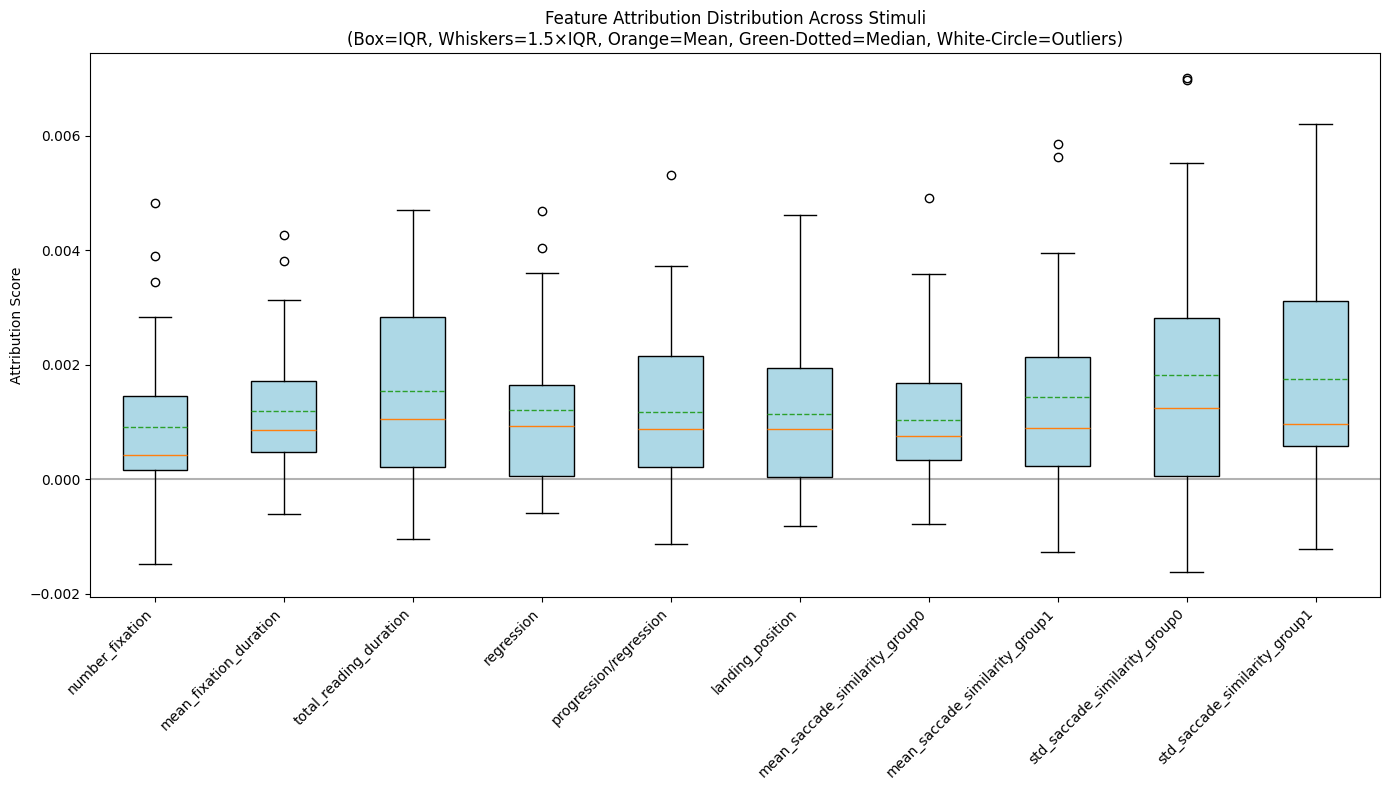


Feature Attribution Summary:
------------------------------------------------------------
number_fixation               : Mean= 0.0009, Std= 0.0014, Min=-0.0015, Max= 0.0048
mean_fixation_duration        : Mean= 0.0012, Std= 0.0013, Min=-0.0006, Max= 0.0043
total_reading_duration        : Mean= 0.0015, Std= 0.0016, Min=-0.0011, Max= 0.0047
regression                    : Mean= 0.0012, Std= 0.0013, Min=-0.0006, Max= 0.0047
progression/regression        : Mean= 0.0012, Std= 0.0014, Min=-0.0011, Max= 0.0053
landing_position              : Mean= 0.0011, Std= 0.0014, Min=-0.0008, Max= 0.0046
mean_saccade_similarity_group0: Mean= 0.0010, Std= 0.0012, Min=-0.0008, Max= 0.0049
mean_saccade_similarity_group1: Mean= 0.0014, Std= 0.0017, Min=-0.0013, Max= 0.0059
std_saccade_similarity_group0 : Mean= 0.0018, Std= 0.0021, Min=-0.0016, Max= 0.0070
std_saccade_similarity_group1 : Mean= 0.0017, Std= 0.0019, Min=-0.0012, Max= 0.0062


In [73]:
feature_names = [
    "number_fixation",
    "mean_fixation_duration", 
    "total_reading_duration",
    "regression",
    "progression/regression",
    "landing_position",
    "mean_saccade_similarity_group0",
    "mean_saccade_similarity_group1",
    "std_saccade_similarity_group0",
    "std_saccade_similarity_group1"
]
num_stimuli = 30
attributions = []
errors = []

for i in range(len(results)):
    input_tensor = results[i]['X_test']
    target_class = results[i]['y_test']

    att, err = explain_prediction(results[i]['model'], input_tensor, target_class)
    attributions.append(att.squeeze().cpu().detach().numpy())
    errors.append(err.cpu().numpy())

# Average across folds
attributions = np.array(attributions)
attributions = attributions.mean(axis=0)  # Average across folds if needed

if len(attributions.shape) > 1:
    attributions = np.mean(attributions, axis=0)  # Average across subjects if needed

# Reshape to get attribution matrix (features x stimuli)
attribution_matrix = attributions.reshape(len(feature_names), num_stimuli)

print(f"Approximation Error: {np.mean(errors)} (< 0.05 is good)")

# Create visualizations
print("\n" + "="*60)
print("FEATURE ANALYSIS")
print("="*60)

# Box plot visualization
visualize_attribution_boxplot(attribution_matrix, feature_names)

#### All features

In [74]:
def vectorize(SimAndFeatureVals, subj, stim, vec):
    vector_roi = np.zeros((len(subj), 14))
    for s, subj_id in enumerate(subj):
        # add general features
        Features = GlobalFeature_array[stim][subj_id]
        vector_roi[s][0] = Features['number_fixation']
        vector_roi[s][1] = Features['mean_saccade_amplitude']
        vector_roi[s][2] = Features['std_fixation_duration']
        vector_roi[s][3] = Features['mean_fixation_duration']
        vector_roi[s][4] = Features['std_fixation_duration']
        vector_roi[s][5] = Features['total_reading_duration']
        vector_roi[s][6] = Features['regression']
        vector_roi[s][7] = Features['progression/regression']
        vector_roi[s][8] = Features['fixation_entropy']
        vector_roi[s][9] = SimAndFeatureVals[s][0][0][3]
        vector_roi[s][10] = SimAndFeatureVals[s][0][0][4]
        vector_roi[s][11] = SimAndFeatureVals[s][0][0][5]
        vector_roi[s][12] = SimAndFeatureVals[s][0][0][6]
        vector_roi[s][13] = SimAndFeatureVals[s][0][0][7]
        
    
    if vec.size != 0:
        vector_roi = np.append(vector_roi, vec, axis=1)
    return vector_roi

In [75]:
import torch
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix
from IPython.utils import io
import numpy as np
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

torch.manual_seed(42)
np.random.seed(42)

# Define the neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(420, 210)
        self.dropout1 = nn.Dropout(p=0.2)  
        self.fc2 = nn.Linear(210, 105)
        self.dropout2 = nn.Dropout(p=0.2)
        self.fc3 = nn.Linear(105, 53) 
        self.dropout3 = nn.Dropout(p=0.2)
        self.fc4 = nn.Linear(53, 2)
        self.softmax = nn.Softmax(dim=1)

        # Initialize weights using Xavier uniform
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)
        nn.init.xavier_uniform_(self.fc4.weight)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout3(x)
        x = self.softmax(self.fc4(x)) 
        return x
    
results = train_test_pipeline(stimuli)

Using device: cuda
Epoch 0 loss: 0.7668331861495972
Epoch 5 loss: 0.4066239297389984
Epoch 10 loss: 0.34674641489982605
Epoch 15 loss: 0.33546003699302673
Epoch 0 loss: 0.7519657611846924
Epoch 5 loss: 0.3933064043521881
Epoch 10 loss: 0.3351198434829712
Epoch 15 loss: 0.3276546895503998
Epoch 0 loss: 0.7720777988433838
Epoch 5 loss: 0.38013938069343567
Epoch 10 loss: 0.3544146716594696
Epoch 15 loss: 0.3191984295845032
Epoch 0 loss: 0.6936143040657043
Epoch 5 loss: 0.3807332217693329
Epoch 10 loss: 0.35097068548202515
Epoch 15 loss: 0.33843743801116943
Epoch 0 loss: 0.6753236651420593
Epoch 5 loss: 0.3638058304786682
Epoch 10 loss: 0.33137911558151245
Epoch 15 loss: 0.317969411611557
Epoch 0 loss: 0.6872178316116333
Epoch 5 loss: 0.3850795328617096
Epoch 10 loss: 0.330931156873703
Epoch 15 loss: 0.3196258246898651
Epoch 0 loss: 0.6974767446517944
Epoch 5 loss: 0.3595004081726074
Epoch 10 loss: 0.34063878655433655
Epoch 15 loss: 0.33893102407455444
Epoch 0 loss: 0.8071953058242798
Epoc

In [76]:
_ = train_test_pipeline(stimuli, 0.5)

Using device: cuda
Epoch 0 loss: 0.7668331861495972
Epoch 5 loss: 0.4292072355747223
Epoch 10 loss: 0.3730901777744293
Epoch 15 loss: 0.34942784905433655
Epoch 0 loss: 0.7519657611846924
Epoch 5 loss: 0.41793736815452576
Epoch 10 loss: 0.34785354137420654
Epoch 15 loss: 0.3380463123321533
Epoch 0 loss: 0.7720777988433838
Epoch 5 loss: 0.38602569699287415
Epoch 10 loss: 0.3703039586544037
Epoch 15 loss: 0.339540034532547
Epoch 0 loss: 0.6936143040657043
Epoch 5 loss: 0.4047395586967468
Epoch 10 loss: 0.37816447019577026
Epoch 15 loss: 0.3478754162788391
Epoch 0 loss: 0.6753236651420593
Epoch 5 loss: 0.3742370307445526
Epoch 10 loss: 0.352886438369751
Epoch 15 loss: 0.3256586194038391
Epoch 0 loss: 0.6872178316116333
Epoch 5 loss: 0.40495216846466064
Epoch 10 loss: 0.3577162027359009
Epoch 15 loss: 0.3396974205970764
Epoch 0 loss: 0.6974767446517944
Epoch 5 loss: 0.3725670278072357
Epoch 10 loss: 0.35693228244781494
Epoch 15 loss: 0.3464435040950775
Epoch 0 loss: 0.8071953058242798
Epoch

Approximation Error: -0.00012247585982549936 (< 0.05 is good)

FEATURE ANALYSIS


C:\Users\Utente\AppData\Local\Temp\ipykernel_29256\2144360451.py:50: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(box_data, labels=feature_names, patch_artist=True,


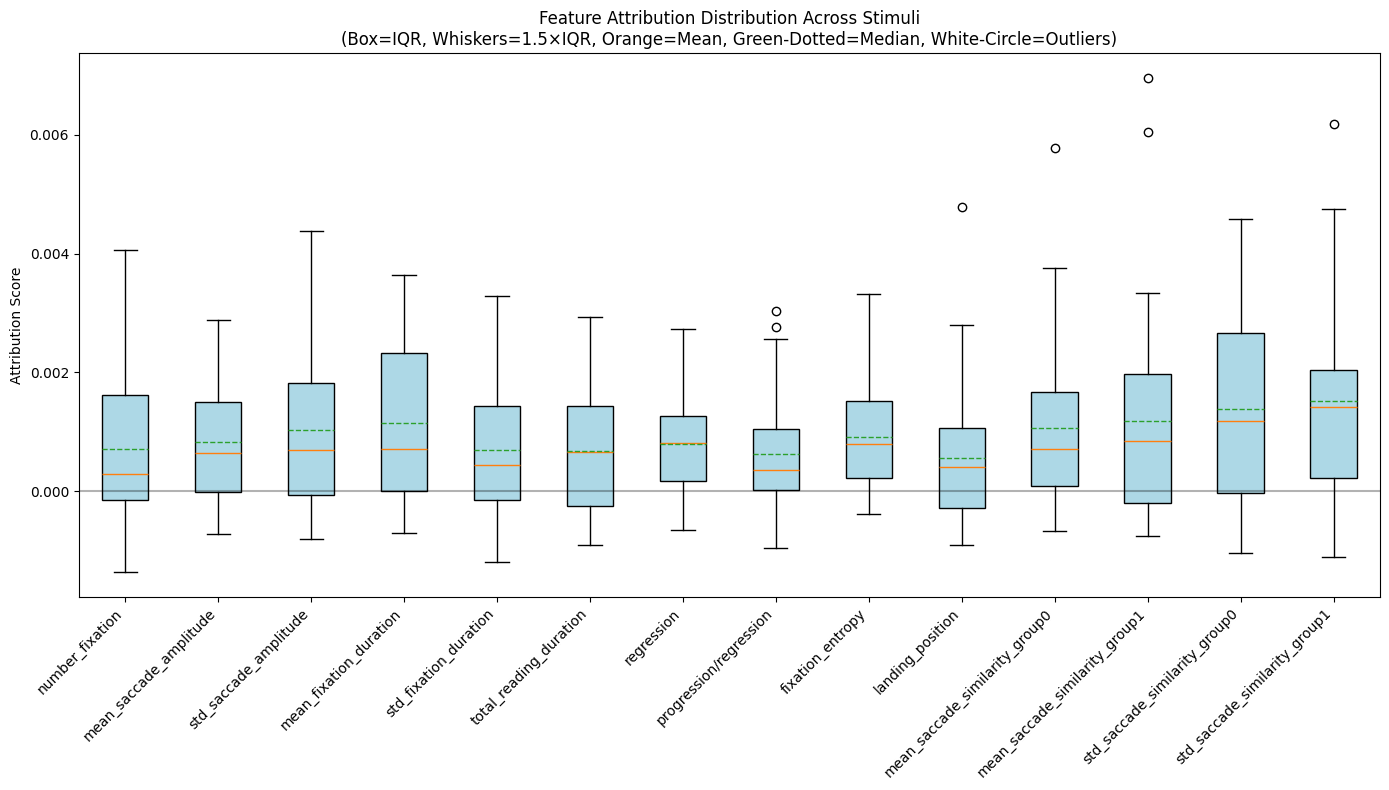


Feature Attribution Summary:
------------------------------------------------------------
number_fixation               : Mean= 0.0007, Std= 0.0014, Min=-0.0014, Max= 0.0041
mean_saccade_amplitude        : Mean= 0.0008, Std= 0.0010, Min=-0.0007, Max= 0.0029
std_saccade_amplitude         : Mean= 0.0010, Std= 0.0013, Min=-0.0008, Max= 0.0044
mean_fixation_duration        : Mean= 0.0012, Std= 0.0013, Min=-0.0007, Max= 0.0036
std_fixation_duration         : Mean= 0.0007, Std= 0.0012, Min=-0.0012, Max= 0.0033
total_reading_duration        : Mean= 0.0007, Std= 0.0010, Min=-0.0009, Max= 0.0029
regression                    : Mean= 0.0008, Std= 0.0009, Min=-0.0007, Max= 0.0027
progression/regression        : Mean= 0.0006, Std= 0.0010, Min=-0.0010, Max= 0.0030
fixation_entropy              : Mean= 0.0009, Std= 0.0009, Min=-0.0004, Max= 0.0033
landing_position              : Mean= 0.0006, Std= 0.0012, Min=-0.0009, Max= 0.0048
mean_saccade_similarity_group0: Mean= 0.0011, Std= 0.0014, Min=-0.000

In [77]:
feature_names = [
    "number_fixation",
    "mean_saccade_amplitude",
    "std_saccade_amplitude",
    "mean_fixation_duration",
    "std_fixation_duration",
    "total_reading_duration",
    "regression",
    "progression/regression",
    "fixation_entropy",
    "landing_position",
    "mean_saccade_similarity_group0",
    "mean_saccade_similarity_group1",
    "std_saccade_similarity_group0",
    "std_saccade_similarity_group1"
]
num_stimuli = 30
attributions = []
errors = []

for i in range(len(results)):
    input_tensor = results[i]['X_test']
    target_class = results[i]['y_test']

    att, err = explain_prediction(results[i]['model'], input_tensor, target_class)
    attributions.append(att.squeeze().cpu().detach().numpy())
    errors.append(err.cpu().numpy())

# Average across folds
attributions = np.array(attributions)
attributions = attributions.mean(axis=0)  # Average across folds if needed

if len(attributions.shape) > 1:
    attributions = np.mean(attributions, axis=0)  # Average across subjects if needed

# Reshape to get attribution matrix (features x stimuli)
attribution_matrix = attributions.reshape(len(feature_names), num_stimuli)

print(f"Approximation Error: {np.mean(errors)} (< 0.05 is good)")

# Create visualizations
print("\n" + "="*60)
print("FEATURE ANALYSIS")
print("="*60)

# Box plot visualization
visualize_attribution_boxplot(attribution_matrix, feature_names)

#### Now we try to dont consider features that use time information

In [78]:
def vectorize(SimAndFeatureVals, subj, stim, vec):
    vector_roi = np.zeros((len(subj), 8))
    for s, subj_id in enumerate(subj):
        # add general features
        Features = GlobalFeature_array[stim][subj_id]
        vector_roi[s][0] = Features['number_fixation']
        vector_roi[s][1] = Features['regression']
        vector_roi[s][2] = Features['progression/regression']
        vector_roi[s][3] = SimAndFeatureVals[s][0][0][3]
        vector_roi[s][4] = SimAndFeatureVals[s][0][0][4]
        vector_roi[s][5] = SimAndFeatureVals[s][0][0][5] 
        vector_roi[s][6] = SimAndFeatureVals[s][0][0][6] 
        vector_roi[s][7] = SimAndFeatureVals[s][0][0][7]

    if vec.size != 0: 
        vector_roi = np.append(vector_roi, vec, axis=1)
    return vector_roi

In [79]:
import torch
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix
from IPython.utils import io
import numpy as np
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

torch.manual_seed(42)
np.random.seed(42)

# Define the neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(240, 120)
        self.dropout1 = nn.Dropout(p=0.2)  
        self.fc2 = nn.Linear(120, 60)
        self.dropout2 = nn.Dropout(p=0.2)
        self.fc3 = nn.Linear(60, 30) 
        self.dropout3 = nn.Dropout(p=0.2)
        self.fc4 = nn.Linear(30, 2)
        self.softmax = nn.Softmax(dim=1)

        # Initialize weights using Xavier uniform
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)
        nn.init.xavier_uniform_(self.fc4.weight)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout3(x)
        x = self.softmax(self.fc4(x)) 
        return x
    

results = train_test_pipeline(stimuli)

Using device: cuda
Epoch 0 loss: 0.7093049883842468
Epoch 5 loss: 0.45472341775894165
Epoch 10 loss: 0.3737958073616028
Epoch 15 loss: 0.34718477725982666
Epoch 0 loss: 0.7789258360862732
Epoch 5 loss: 0.476369172334671
Epoch 10 loss: 0.40422990918159485
Epoch 15 loss: 0.3695756793022156
Epoch 0 loss: 0.7419410347938538
Epoch 5 loss: 0.47464635968208313
Epoch 10 loss: 0.39963066577911377
Epoch 15 loss: 0.38264358043670654
Epoch 0 loss: 0.6709700226783752
Epoch 5 loss: 0.4561197757720947
Epoch 10 loss: 0.3606037199497223
Epoch 15 loss: 0.34307795763015747
Epoch 0 loss: 0.7202612161636353
Epoch 5 loss: 0.4538419246673584
Epoch 10 loss: 0.4062589704990387
Epoch 15 loss: 0.3663210868835449
Epoch 0 loss: 0.703503429889679
Epoch 5 loss: 0.42496025562286377
Epoch 10 loss: 0.396380215883255
Epoch 15 loss: 0.3485400974750519
Epoch 0 loss: 0.7441208958625793
Epoch 5 loss: 0.4616015553474426
Epoch 10 loss: 0.3761110305786133
Epoch 15 loss: 0.3600881099700928
Epoch 0 loss: 0.7681662440299988
Epoch

In [80]:
feature_names = [
    "number_fixation",
    "regression",
    "progression/regression",
    "landing_position",
    "mean_saccade_similarity_group0",
    "mean_saccade_similarity_group1",
    "std_saccade_similarity_group0",
    "std_saccade_similarity_group1"
]

Approximation Error: -9.382549615111202e-05 (< 0.05 is good)

FEATURE ANALYSIS


C:\Users\Utente\AppData\Local\Temp\ipykernel_29256\2144360451.py:50: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(box_data, labels=feature_names, patch_artist=True,


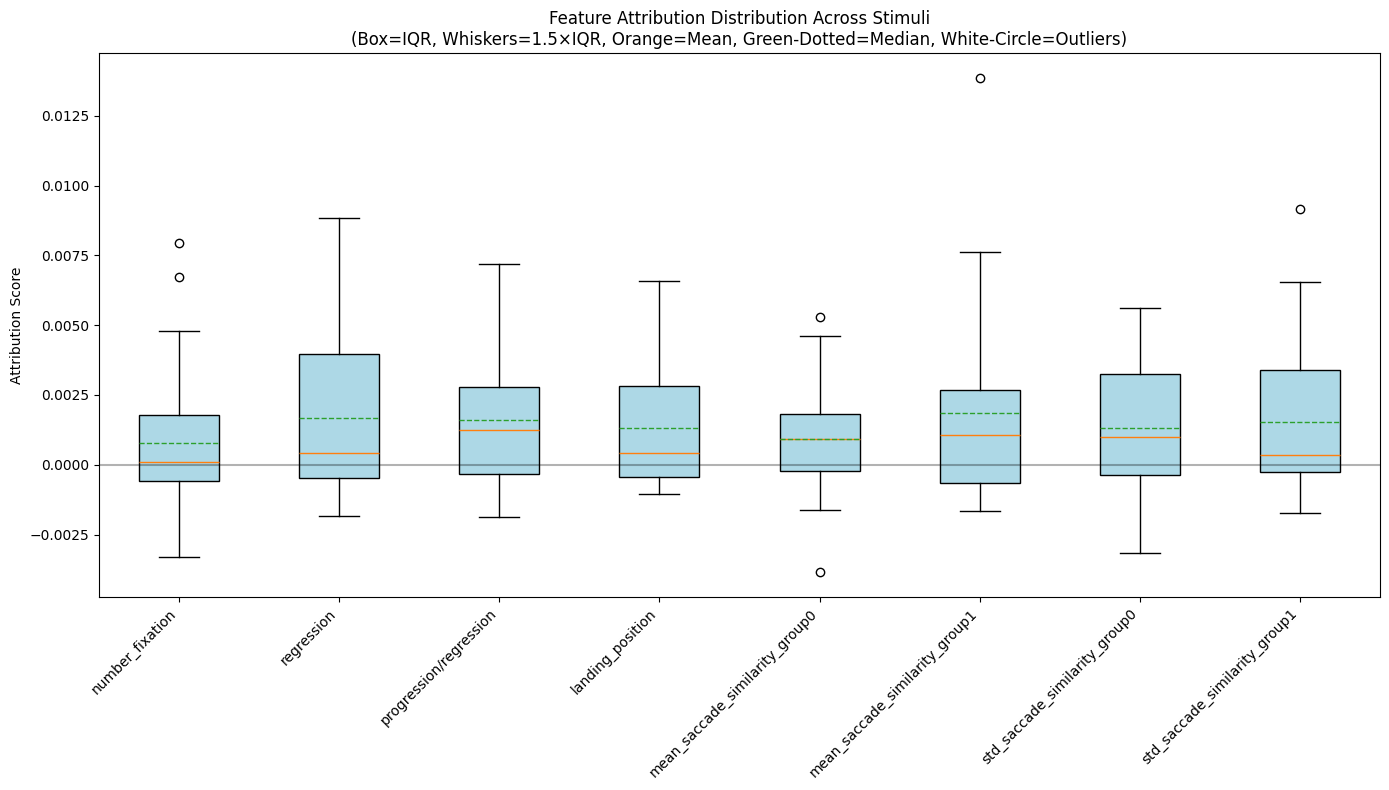


Feature Attribution Summary:
------------------------------------------------------------
number_fixation               : Mean= 0.0008, Std= 0.0025, Min=-0.0033, Max= 0.0079
regression                    : Mean= 0.0017, Std= 0.0029, Min=-0.0018, Max= 0.0088
progression/regression        : Mean= 0.0016, Std= 0.0026, Min=-0.0019, Max= 0.0072
landing_position              : Mean= 0.0013, Std= 0.0021, Min=-0.0011, Max= 0.0066
mean_saccade_similarity_group0: Mean= 0.0009, Std= 0.0019, Min=-0.0039, Max= 0.0053
mean_saccade_similarity_group1: Mean= 0.0019, Std= 0.0034, Min=-0.0017, Max= 0.0139
std_saccade_similarity_group0 : Mean= 0.0013, Std= 0.0023, Min=-0.0031, Max= 0.0056
std_saccade_similarity_group1 : Mean= 0.0015, Std= 0.0026, Min=-0.0017, Max= 0.0092


In [81]:
num_stimuli = 30
attributions = []
errors = []

for i in range(len(results)):
    input_tensor = results[i]['X_test']
    target_class = results[i]['y_test']

    att, err = explain_prediction(results[i]['model'], input_tensor, target_class)
    attributions.append(att.squeeze().cpu().detach().numpy())
    errors.append(err.cpu().numpy())

# Average across folds
attributions = np.array(attributions)
attributions = attributions.mean(axis=0)  # Average across folds if needed

if len(attributions.shape) > 1:
    attributions = np.mean(attributions, axis=0)  # Average across subjects if needed

# Reshape to get attribution matrix (features x stimuli)
attribution_matrix = attributions.reshape(len(feature_names), num_stimuli)

print(f"Approximation Error: {np.mean(errors)} (< 0.05 is good)")

# Create visualizations
print("\n" + "="*60)
print("FEATURE ANALYSIS")
print("="*60)

# Box plot visualization
visualize_attribution_boxplot(attribution_matrix, feature_names)

In [82]:
def vectorize(SimAndFeatureVals, subj, stim, vec):
    vector_roi = np.zeros((len(subj), 4))
    for s, subj_id in enumerate(subj):
        # add general features
        Features = GlobalFeature_array[stim][subj_id]
        vector_roi[s][0] = Features['number_fixation']
        vector_roi[s][1] = Features['regression']
        vector_roi[s][2] = Features['progression/regression']
        vector_roi[s][3] = SimAndFeatureVals[s][0][0][3]

    if vec.size != 0:
        vector_roi = np.append(vector_roi, vec, axis=1)
    return vector_roi

In [83]:
import torch
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix
from IPython.utils import io
import numpy as np
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

torch.manual_seed(42)
np.random.seed(42)

# Define the neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(120, 60)
        self.dropout1 = nn.Dropout(p=0.2)
        self.fc2 = nn.Linear(60, 30) 
        self.dropout2 = nn.Dropout(p=0.2)
        self.fc3 = nn.Linear(30, 2)
        self.softmax = nn.Softmax(dim=1)

        # Initialize weights using Xavier uniform
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = self.softmax(self.fc3(x)) 
        return x
    

results = train_test_pipeline(stimuli)

Using device: cuda
Epoch 0 loss: 0.7960521578788757
Epoch 5 loss: 0.46191009879112244
Epoch 10 loss: 0.39694496989250183
Epoch 15 loss: 0.3815282881259918
Epoch 0 loss: 0.7446156144142151
Epoch 5 loss: 0.4514506459236145
Epoch 10 loss: 0.3984942138195038
Epoch 15 loss: 0.3762270212173462
Epoch 0 loss: 0.7682734727859497
Epoch 5 loss: 0.4766480624675751
Epoch 10 loss: 0.4150794744491577
Epoch 15 loss: 0.3574000895023346
Epoch 0 loss: 0.7365850210189819
Epoch 5 loss: 0.45080798864364624
Epoch 10 loss: 0.3961237072944641
Epoch 15 loss: 0.3642352819442749
Epoch 0 loss: 0.7448078393936157
Epoch 5 loss: 0.48189395666122437
Epoch 10 loss: 0.42055365443229675
Epoch 15 loss: 0.3800243139266968
Epoch 0 loss: 0.6938766241073608
Epoch 5 loss: 0.48415321111679077
Epoch 10 loss: 0.4322427213191986
Epoch 15 loss: 0.38585391640663147
Epoch 0 loss: 0.7677966952323914
Epoch 5 loss: 0.45663702487945557
Epoch 10 loss: 0.3973577618598938
Epoch 15 loss: 0.37284061312675476
Epoch 0 loss: 0.7656815052032471
E

---

In [84]:
def vectorize(SimAndFeatureVals, subj, stim, vec):
    vector_roi = np.zeros((len(subj), 4))
    for s, subj_id in enumerate(subj):
        vector_roi[s][0] = SimAndFeatureVals[s][0][0][4] # mean saccade similarity group 0
        vector_roi[s][1] = SimAndFeatureVals[s][0][0][5] # mean saccade similarity group 1
        vector_roi[s][2] = SimAndFeatureVals[s][0][0][6] # std saccade similarity group 0
        vector_roi[s][3] = SimAndFeatureVals[s][0][0][7] # std saccade similarity group 1

    if vec.size != 0:
        vector_roi = np.append(vector_roi, vec, axis=1)
    return vector_roi

In [85]:
import re


torch.manual_seed(42)
np.random.seed(42)

# Define the neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(120, 60)
        self.dropout1 = nn.Dropout(p=0.2)  
        self.fc2 = nn.Linear(60, 30)
        self.dropout2 = nn.Dropout(p=0.2)
        self.fc3 = nn.Linear(30, 15) 
        self.dropout3 = nn.Dropout(p=0.2)
        self.fc4 = nn.Linear(15, 2)
        self.softmax = nn.Softmax(dim=1)

        # Initialize weights using Xavier uniform
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)
        nn.init.xavier_uniform_(self.fc4.weight)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout3(x)
        x = self.softmax(self.fc4(x)) 
        return x
    
results = train_test_pipeline(stimuli)
results = train_test_pipeline(stimuli, 0.5)

Using device: cuda
Epoch 0 loss: 0.7438777685165405
Epoch 5 loss: 0.5307043790817261
Epoch 10 loss: 0.4462224841117859
Epoch 15 loss: 0.3865533769130707
Epoch 0 loss: 0.6640563011169434
Epoch 5 loss: 0.4306690990924835
Epoch 10 loss: 0.4066084027290344
Epoch 15 loss: 0.3714815378189087
Epoch 0 loss: 0.7319085597991943
Epoch 5 loss: 0.5261625647544861
Epoch 10 loss: 0.44513413310050964
Epoch 15 loss: 0.3979332447052002
Epoch 0 loss: 0.7166725397109985
Epoch 5 loss: 0.5594918131828308
Epoch 10 loss: 0.4532625675201416
Epoch 15 loss: 0.4199681282043457
Epoch 0 loss: 0.7602001428604126
Epoch 5 loss: 0.5547665953636169
Epoch 10 loss: 0.45253148674964905
Epoch 15 loss: 0.42374366521835327
Epoch 0 loss: 0.6782205104827881
Epoch 5 loss: 0.5171563029289246
Epoch 10 loss: 0.4073764979839325
Epoch 15 loss: 0.3848804533481598
Epoch 0 loss: 0.7106868624687195
Epoch 5 loss: 0.4976206421852112
Epoch 10 loss: 0.44824111461639404
Epoch 15 loss: 0.3879447877407074
Epoch 0 loss: 0.8066519498825073
Epoch 